# Customer Segmentation: Exploration, Clustering and Segmentation

This project is intended to profile customer based on a data provided by a firm with the intention of exploring customer profiles and their buying patterns. This is intended to provide insight for tailoring marketing campaign based on costumer's spending tendencies so that its effectiveness can be increased accordingly.

## Contents
#### People
- ID : Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products
- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion
- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place
- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Exploratory Data Analysis (EDA)

First of all, let's import basic library for reading and data framing.

In [1]:
import pandas as pd
import numpy as np

Next we'll load the data and do quick overview of the data and some cleanings.

In [2]:
# Loading the data. Date parsing done initially based on data description.
df = pd.read_csv('marketing_campaign.csv', sep='\t', parse_dates=['Dt_Customer'], infer_datetime_format=True, dayfirst=True)
print(f'{df.info()}\n')

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  2012-09-04       58       635  ...                  7   
1            1  2014-03-08       38        11  ...                  5   
2            0  2013-08-21       26       426  ...                  4   
3            0  2014-02-10       26        11  ...                  6   
4            0  2014-01-19       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2240 rows x 29 columns]

In [3]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [4]:
df.isna().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

From that quick overview, we found out that there are:
- 24 nulls in Income column;
- Extreme max value in Income feature (666666);
- Extreme min value in Year_Birth feature (1893).

For the sake of simplicity, we will impute null values with median of the feature. Those 2 extreme outliers will be dealt based on requirements of each analysis steps, whether omitted temporarily for the sake of chart clarity or removed completely for clustering.

In [5]:
#Create a df copy
df1 = df.copy()

df1['Income'] = df1['Income'].fillna(df1['Income'].median())

df1['Income'].isna().value_counts()

False    2240
Name: Income, dtype: int64

After imputing null values, let's check out for any duplicates.

In [6]:
df1[df1.duplicated(keep=False)]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

From previous quick overview, we also found out that Z_CostContact and Z_Revenue column has single value. We will drop these features as those don't have any significance in our analysis.

In [7]:
df1.drop(['Z_CostContact','Z_Revenue','ID'], axis=1, inplace=True)

Data has the birth year of each customer, but this is hardly useful for analysis. In order to get a better profiling, we need to convert the birth year into age. First, let's find out the enrollment date of the latest customer.

In [8]:
print('Latest enrolled customer:',df1['Dt_Customer'].max())

Latest enrolled customer: 2014-06-29 00:00:00


Secondly, let's assume the data was collected for over 2 years from the latest customer. Hence, we will create Age feature based on this observation and CustFor feature that contains duration of enrollment of customers.

In [9]:
df1['Age'] = 2016 - df['Year_Birth']

df1['CustFor'] = (np.datetime64('2016-06-29') - df1['Dt_Customer']).dt.days

# Redundant feature cleanup
df1.drop(['Year_Birth','Dt_Customer'], axis=1, inplace=True)

Kidhome and Teenhome features refers to the presence of children in a household. We can simplify this by summing both features into new Child feature and dropping those features as those became redundant. 

In [10]:
df1['Child'] = df1[['Kidhome','Teenhome']].sum(axis=1)

df1.drop(['Kidhome','Teenhome'], axis=1, inplace=True)

Now let's take a look at the object type features.

In [11]:
objcols = list(df1.select_dtypes(include='object').columns)

for x in objcols:
    print(f'{df[x].value_counts()}\n')

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64



According to Wikipedia (https://en.wikipedia.org/wiki/Bologna_Process), 2n Cycle is equivalent to Master degree, therefore we can replace 2n Cycle with Master. As for Marital_Status feature, there seems to be some "unique" entries in that feature. To further simplify the category in Marital_Status feature, we will assume the spending of a household mainly based on the presence (or the lack) of partner.

In [12]:
df1['Education'].replace({'2n Cycle':'Master','Graduation':'Graduate'}, inplace=True)

df1['Marital_Status'].replace({'Married':'Partner','Together':'Partner','Divorced':'Alone','Single':'Alone',
                              'Divorced':'Alone','Divorced':'Alone','Widow':'Alone','YOLO':'Alone','Absurd':'Alone'},
                              inplace=True)

# Renaming columns for ease of reference
df1 = df1.rename(columns={'MntWines':'Wine','MntFruits':'Fruit','MntMeatProducts':'Meat',
                          'MntFishProducts':'Fish','MntSweetProducts':'Sweet','MntGoldProds':'Gold'})

# Rearranging columns
df1 = df1[['Age', 'CustFor', 'Education', 'Marital_Status', 'Child',
           'Income', 'Recency', 'Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold',
           'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
           'NumWebVisitsMonth', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4',
           'AcceptedCmp5', 'Complain', 'Response']]

### Marital status, age, education, child, income, spendings and purchases

Now we will explore the data based on the customer's economic, familial, education background and spending habits using charts to spot any tendencies or pattern that may be present in the data. For that, let's import the required libraries first.

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

The linear correlation between features can be visualized clearly with heatmap.

<AxesSubplot:>

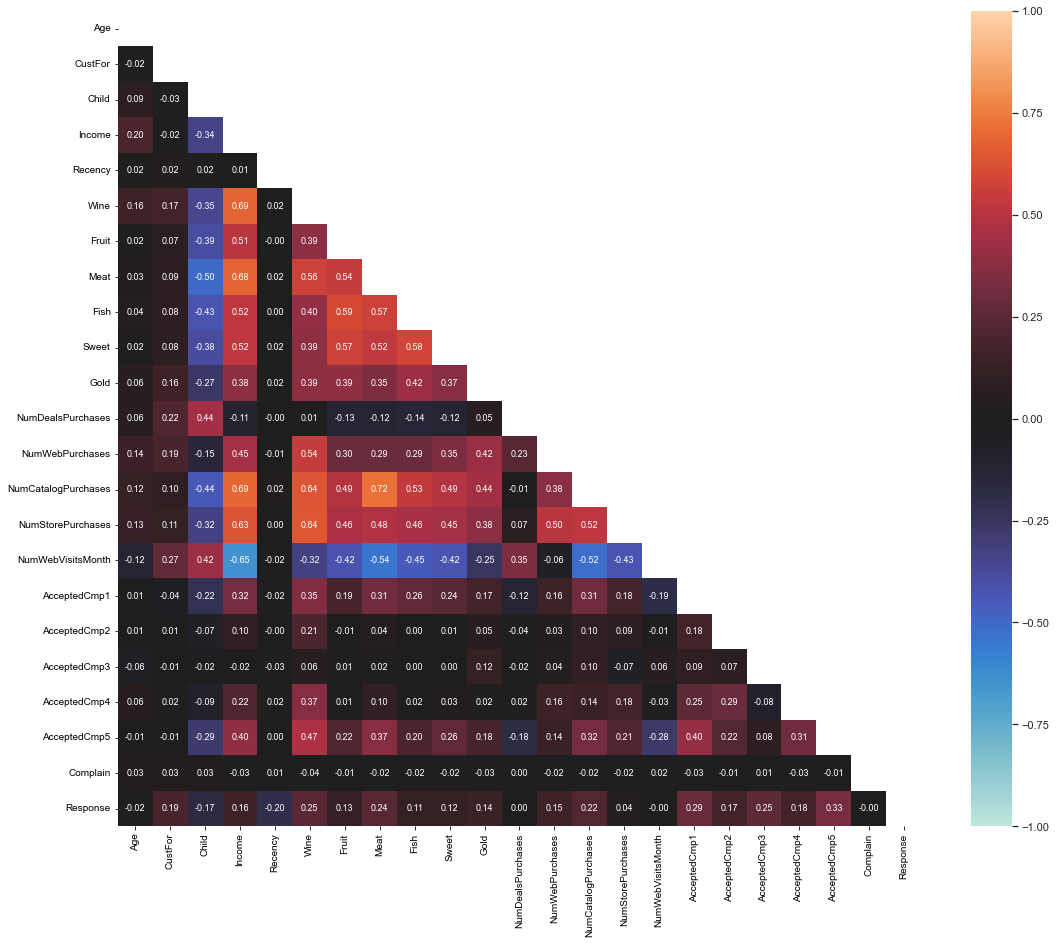

In [14]:
plt.subplots(figsize=(18,15))

# Creating mask for the upper part of correlation map
# Omitting single extreme outlier in Income feature (666666)
mask = np.triu(np.ones_like(df1.query(f'Income < 600000').corr(), dtype=bool))

sns.set(font_scale=1)
sns.heatmap(df1.query(f'Income < 600000').corr(), center=0, vmin=-1, vmax=1, annot=True, annot_kws={'size':9}, fmt='.2f', mask=mask)

Before checking for correlation among features, let's start by checking whether there's correlation between marital status and income, spendings and purchases.

([<matplotlib.patches.Wedge at 0x1de5be68820>,
 [Text(-0.48282435481919106, 0.9883727244281036, 'Partner'),
  Text(0.4828242622810555, -0.9883727696333782, 'Alone')],
 [Text(-0.263358738992286, 0.5391123951426019, '64.5%'),
  Text(0.26335868851693933, -0.5391124198000243, '35.5%')])

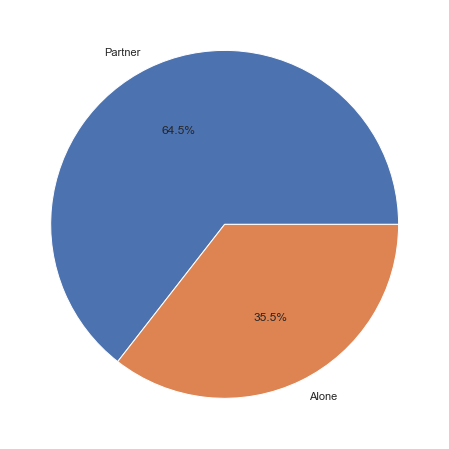

In [15]:
plt.subplots(figsize=(8,8))

plt.pie(df1['Marital_Status'].value_counts(), labels=df1['Marital_Status'].value_counts().index, autopct='%1.1f%%')

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

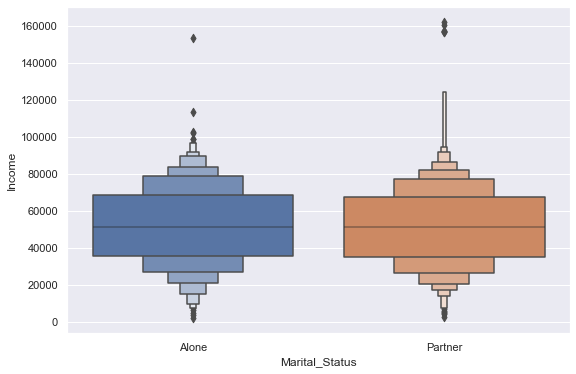

In [16]:
plt.subplots(figsize=(9,6))
sns.boxenplot(data=df1.query('Income < 600000'), x='Marital_Status', y='Income')

Correspondents that have partner make up the majority of the samples, whereas the presence of partner does not have any correlation with the income as the distribution is relatively similar between 2 marriage status.

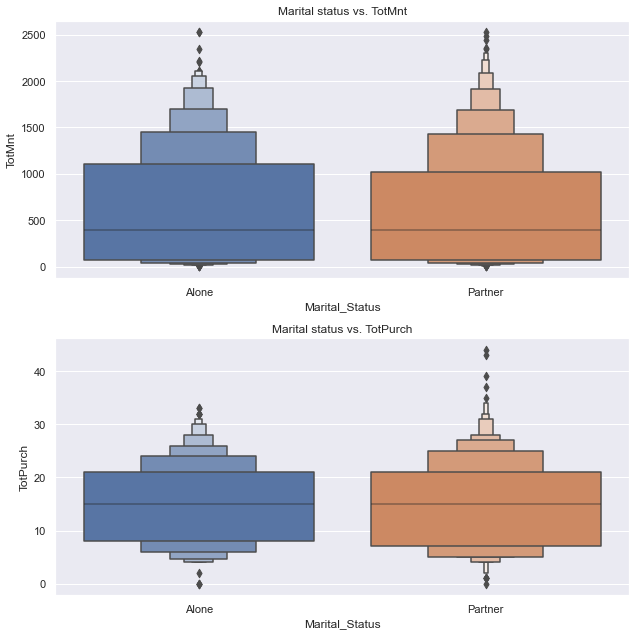

In [17]:
mnts = ['Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']
purchs = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

df1['TotMnt'] = df1[mnts].sum(axis=1)
df1['TotPurch'] = df1[purchs].sum(axis=1)

f, ax = plt.subplots(2,1, figsize=(9,9))

for i, j in enumerate(['TotMnt', 'TotPurch']):
    sns.boxenplot(data=df1, x='Marital_Status', y=j, ax=ax[i])
    ax[i].set_title(f'Marital status vs. {j}')
plt.tight_layout()

The trend continues with total spendings and purchases as we see no notable differences among both marriage status. Let's dig further by checking each category.

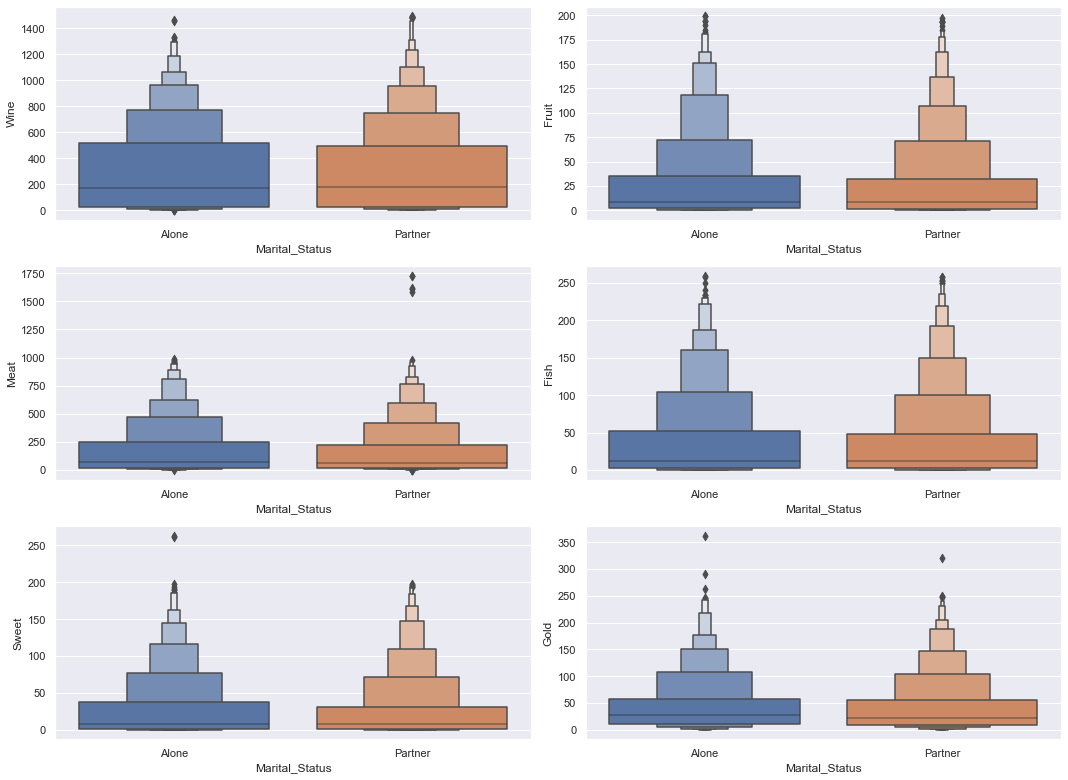

In [18]:
f, ax = plt.subplots(3,2, figsize=(15,11))

for a, b in enumerate(mnts):
    sns.boxenplot(data=df1, x='Marital_Status', y=b, ax=ax.flat[a])
plt.tight_layout()

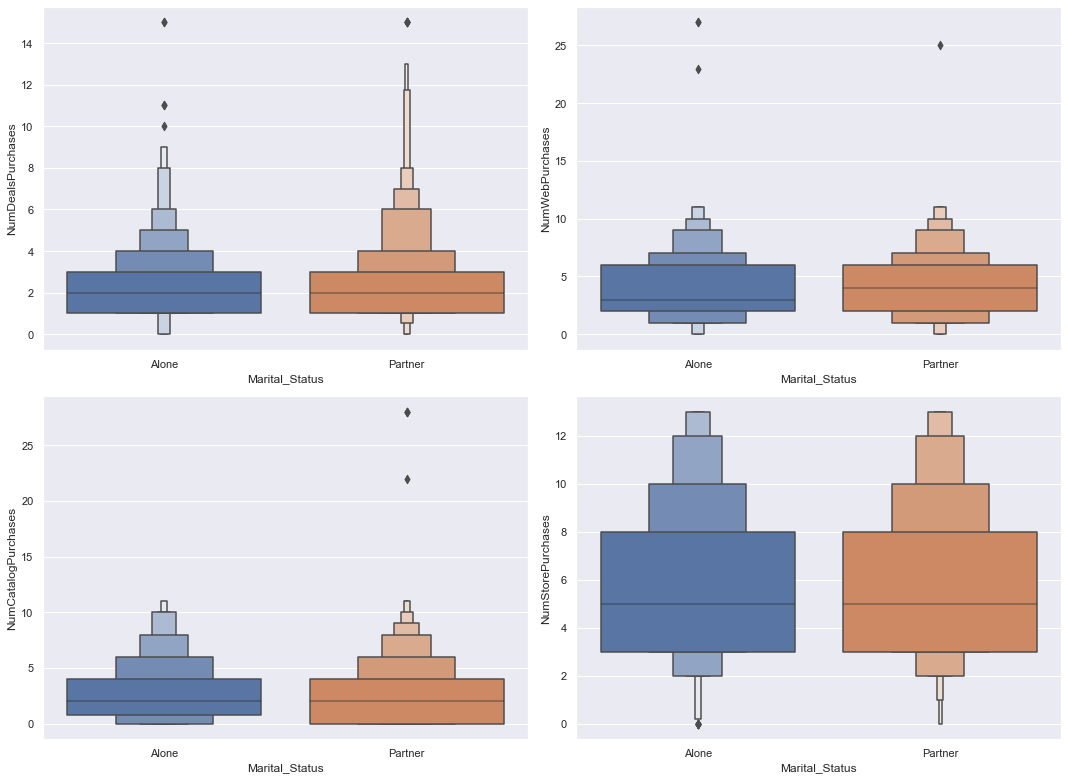

In [19]:
f, ax = plt.subplots(2,2, figsize=(15,11))

for a, b in enumerate(purchs):
    sns.boxenplot(data=df1, x='Marital_Status', y=b, ax=ax.flat[a])
plt.tight_layout()

From both figures, we can safely say that marital status does not have any meaningful correlation towards income, spendings and purchases.

For the next segment, we will investigate education level and presence of child in a household.

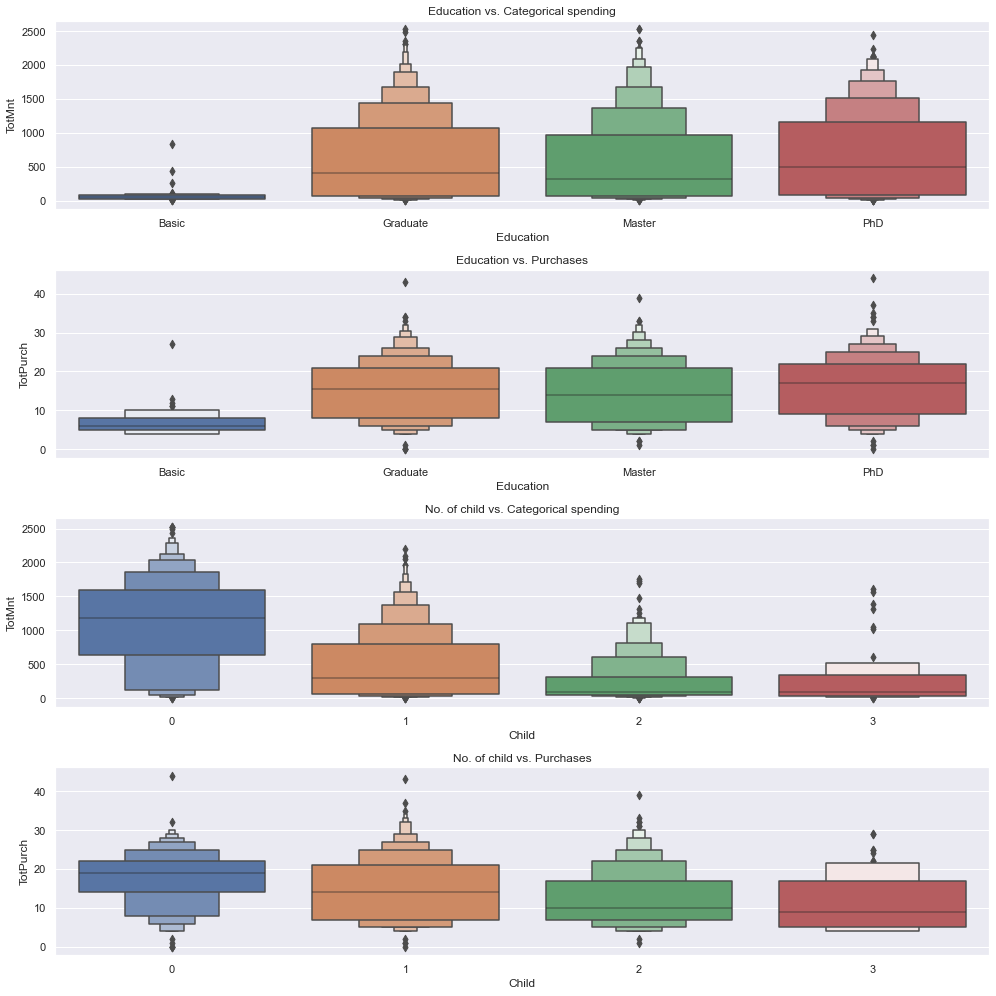

In [20]:
f, ax = plt.subplots(4,1,figsize=(14,14))

order = ['Basic', 'Graduate', 'Master', 'PhD']

sns.boxenplot(data=df1.query('Income < 600000'), x='Education', y='TotMnt', order=order, ax=ax[0]).set_title('Education vs. Categorical spending')
sns.boxenplot(data=df1.query('Income < 600000'), x='Education', y='TotPurch', order=order, ax=ax[1]).set_title('Education vs. Purchases')
sns.boxenplot(data=df1.query('Income < 600000'), x='Child', y='TotMnt', ax=ax[2]).set_title('No. of child vs. Categorical spending')
sns.boxenplot(data=df1.query('Income < 600000'), x='Child', y='TotPurch', ax=ax[3]).set_title('No. of child vs. Purchases')

plt.tight_layout()

There's a massive difference of total spendings and purchases between customers with Basic degree and the rest, which we will look into later in analysis. As for number of child in a household, we can see a downtrend in total spendings and purchases.

Now we willd dig deeper into this by checking linear correlation of each features.

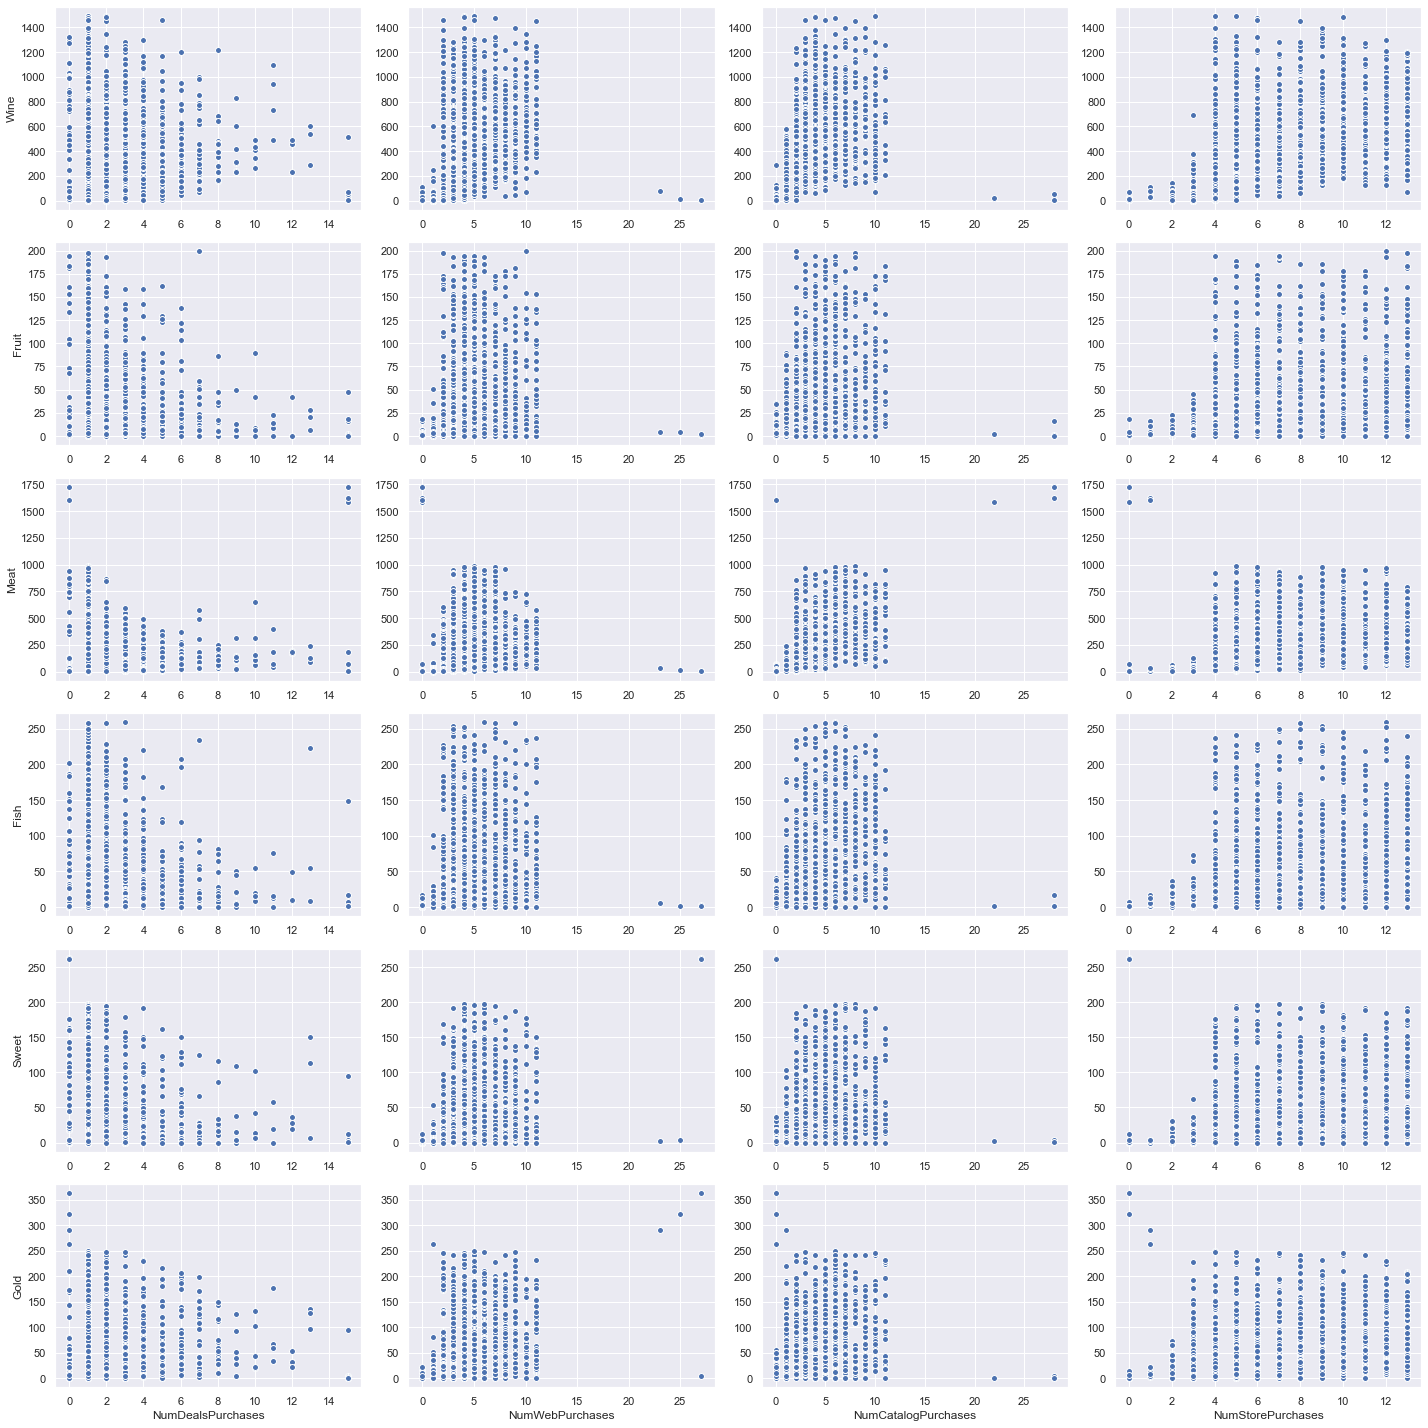

In [21]:
f, ax = plt.subplots(6,4,figsize=(20,20))

for i, j in enumerate(mnts):
    for k, l in enumerate(purchs):
        ax[i,k].scatter(x=df1.query(f'Income < 600000')[l], y=df1.query(f'Income < 600000')[j], edgecolors='white')
        ax[5,k].set_xlabel(l)
        ax[i,0].set_ylabel(j)

plt.tight_layout()

From heatmap and scatter plot above, we can see that there is relatively strong positive correlation between purchases made through catalog and amount of money spent on wine and meat products. Meanwhile web purchases has relative positive correlation towards amount of money spent on wine.

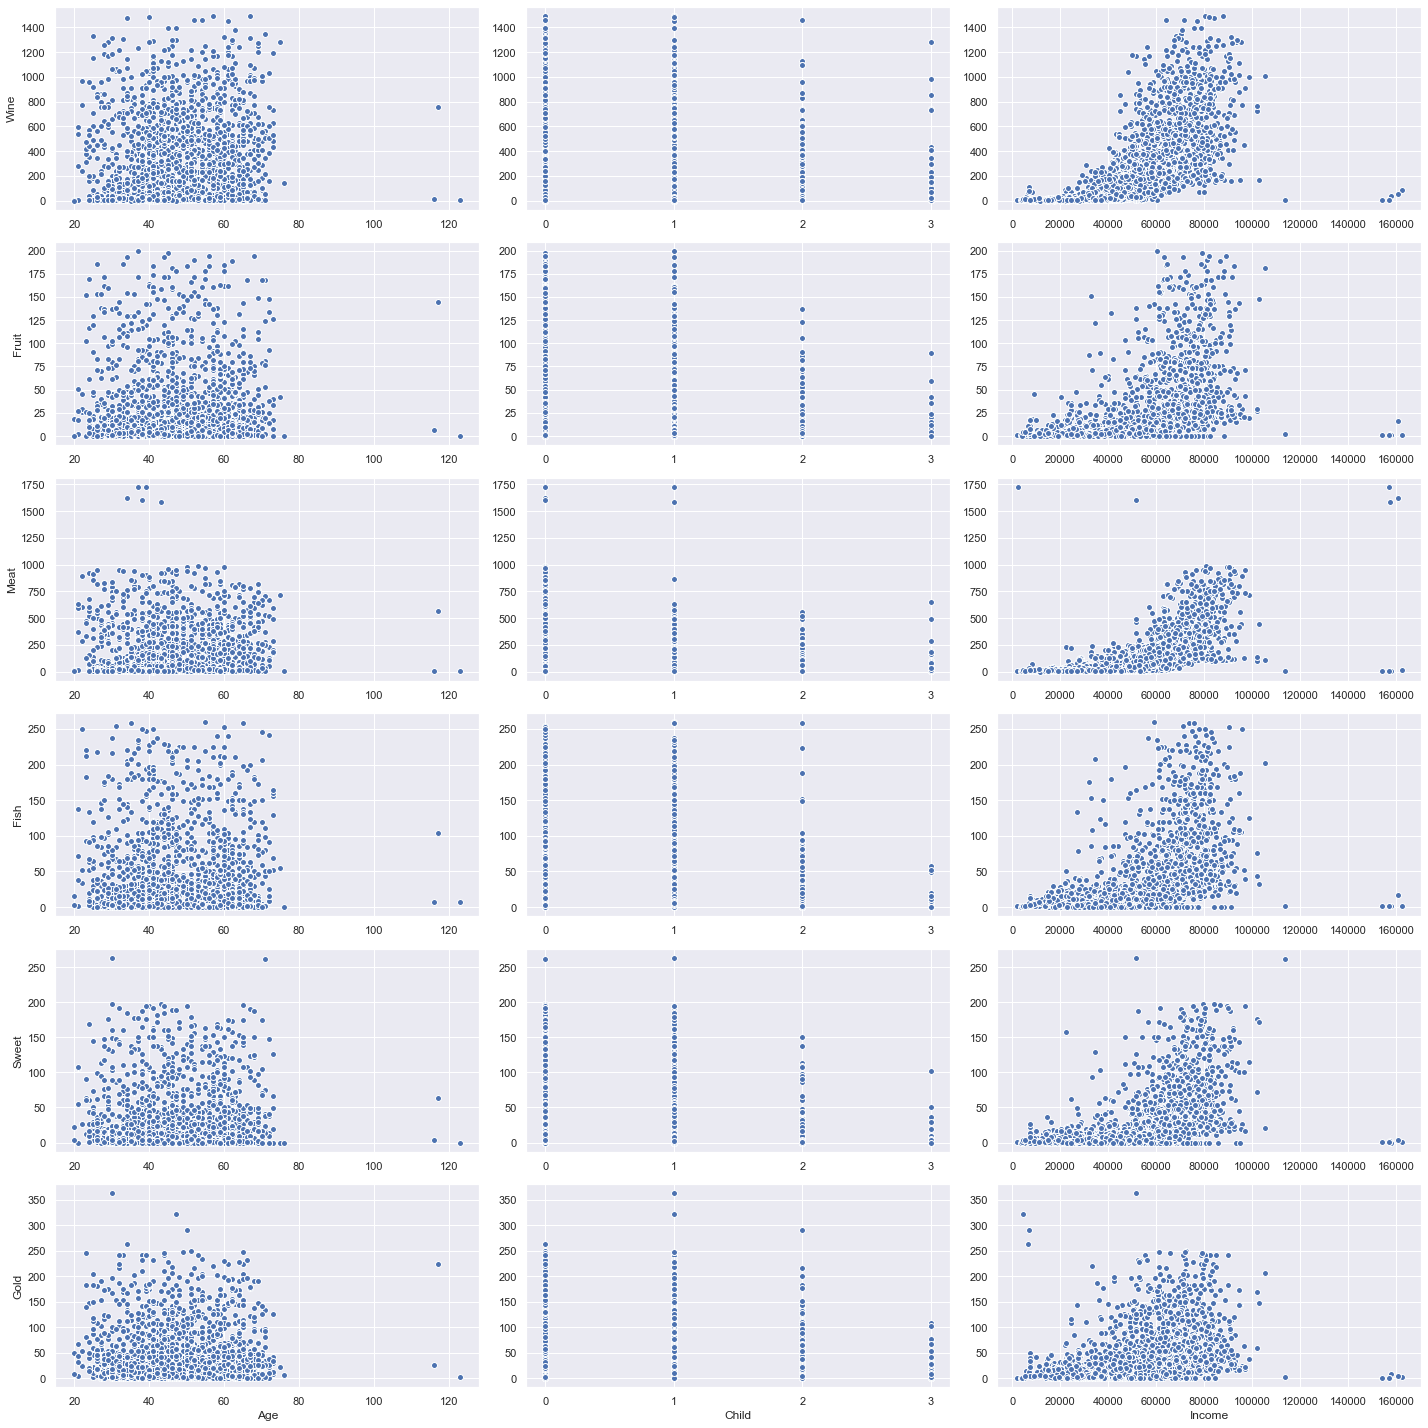

In [22]:
persona = ['Age', 'Child', 'Income']

f, ax = plt.subplots(6,3, figsize=(20,20))

for i, j in enumerate(mnts):
    for k, l in enumerate(persona):
        ax[i,k].scatter(x=df1.query(f'Income < 600000')[l], y=df1.query(f'Income < 600000')[j], edgecolors='white')
        ax[i,1].xaxis.set_major_locator(ticker.MultipleLocator(1))
        ax[5,k].set_xlabel(l)
        ax[i,0].set_ylabel(j)
plt.tight_layout()

From chart above, we can see that categorical spendings increases along with income, significantly so for participants with income at around 40.000 to 100.000. This finding aligns well with Pearson coefficient from previous map. We can also see that spendings tend to decrease along with numbers of children in a household, which aligns well with findings we made in the beginning. While this pattern exist between those two features, to rule out any factors that may actually contribute to this pattern we will check the distribution and correlation between child presence and income of a household after the following analysis.

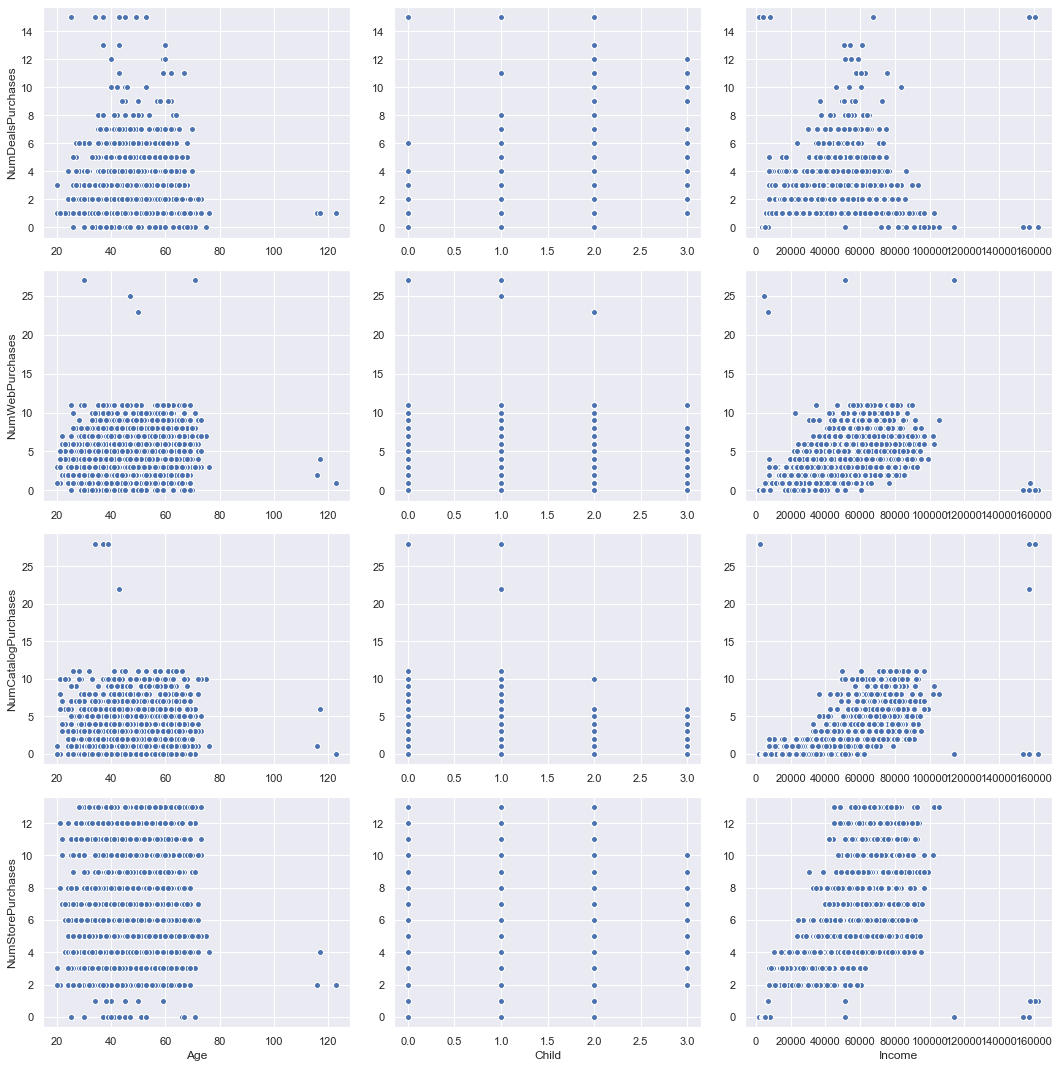

In [23]:
f, ax = plt.subplots(4,3, figsize=(15,15))

for i, j in enumerate(purchs):
    for k, l in enumerate(persona):
        ax[i,k].scatter(x=df1.query(f'Income < 600000')[l], y=df1.query(f'Income < 600000')[j], edgecolors='white')
        ax[3,k].set_xlabel(l)
        ax[i,0].set_ylabel(j)
plt.tight_layout()

Purchases made through company's website, catalog and in-store have clear and positive correlation with the income of the participants, elaborating the findings from previous Pearson correlation heatmap. What is interesting is deals purchases, where we can observe that it tends to converge at certain age and income. Let's dive into it.

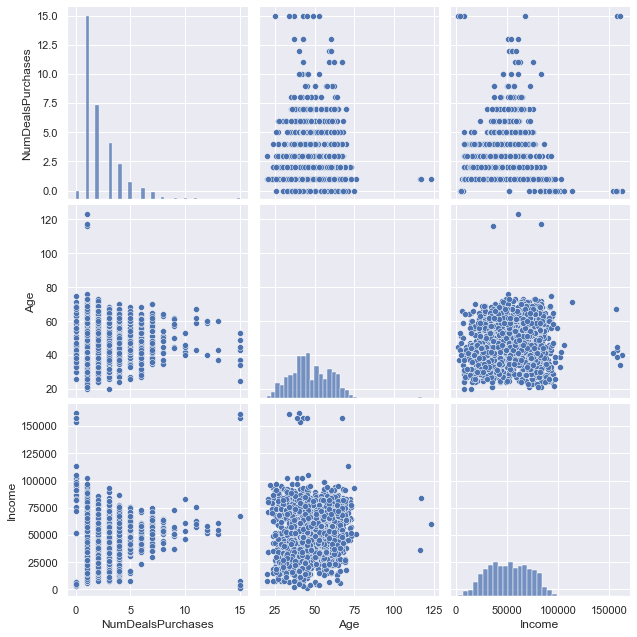

In [24]:
sns.pairplot(data=df1.query('Income < 600000')[['NumDealsPurchases', 'Age', 'Income']], height=3)

We can confirm that the convergence of deals purchased based on age and income of the customers conforms to the distribution of each respective feature. This observation suggest there are no linear correlation between purchase with deals and the age & income of customer (as expected from correlation heatmap) but customers in the middle group of each to make purchases with deals more than other groups (barring any outliers).

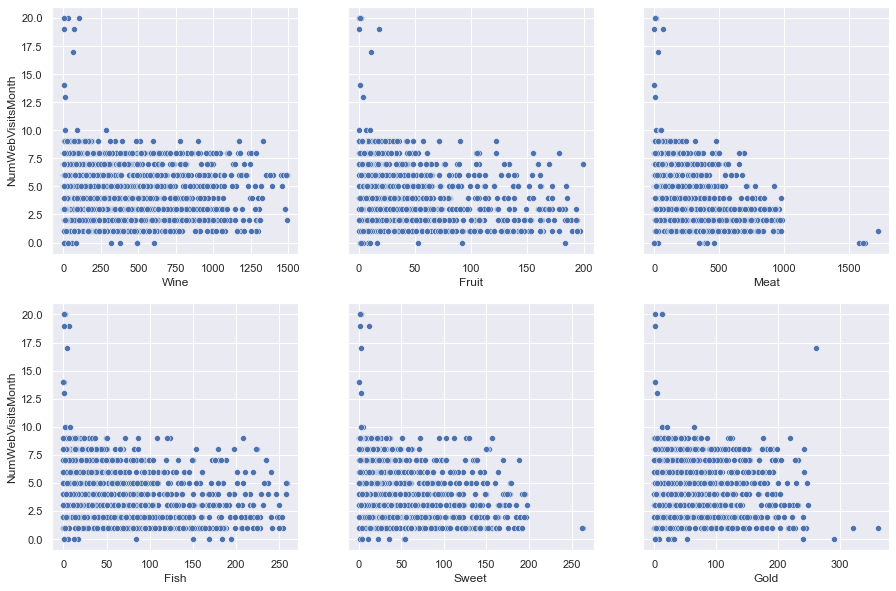

In [25]:
f, ax = plt.subplots(2,3, figsize=(15,10), sharey=True)

for a, b in enumerate(mnts):
    sns.scatterplot(data=df1, y='NumWebVisitsMonth', x=b, ax=ax.flat[a])

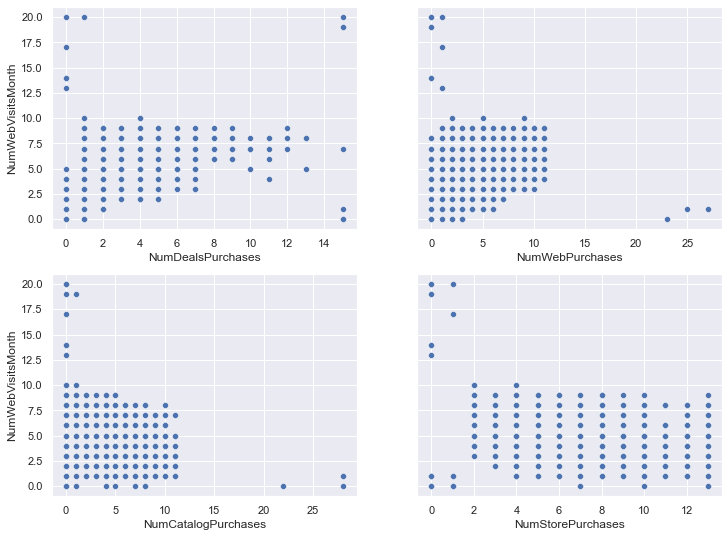

In [26]:
f, ax = plt.subplots(2,2, figsize=(12,9), sharey=True)

for a, b in enumerate(purchs):
    sns.scatterplot(data=df1, y='NumWebVisitsMonth', x=b, ax=ax.flat[a])

No discernible pattern can be observed from correlation between monthly web visits and other features, but will look into correlation between that and income of participants as the correlation heatmap suggest there's some linear correlation between those two.

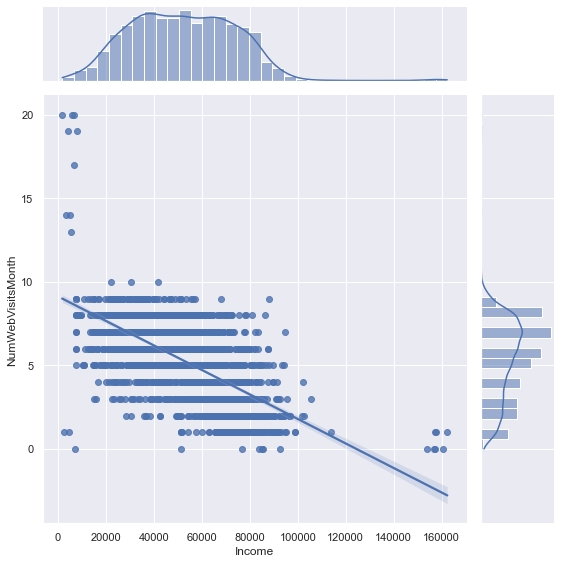

In [27]:
sns.jointplot(data=df1.query('Income < 600000'), x='Income', y='NumWebVisitsMonth', kind='reg', height=8)

Plot above implies that the higher the income, the less likely of them to visit the company's website.

Text(0.5, 1.0, 'Number of child among participants')

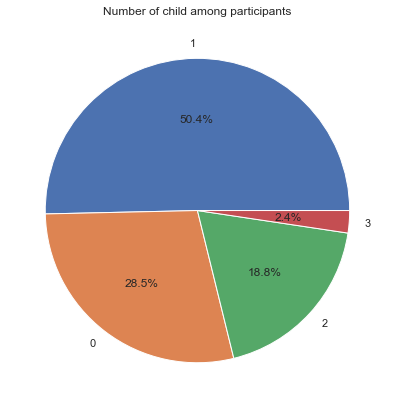

In [28]:
f, ax = plt.subplots(figsize=(7,7))

ax.pie(df1['Child'].value_counts(), labels=df1['Child'].value_counts().index, autopct='%1.1f%%')
ax.set_title('Number of child among participants')

Majority of the participant's household only have 1 child in them, followed by no child and 2 children. What is interesting is the proportion of household with 3 children in them is very low compared to all of the sample population. We will dive into this, alongside with social and economic background, whether this affects or affected by any of the features that are in this dataset.

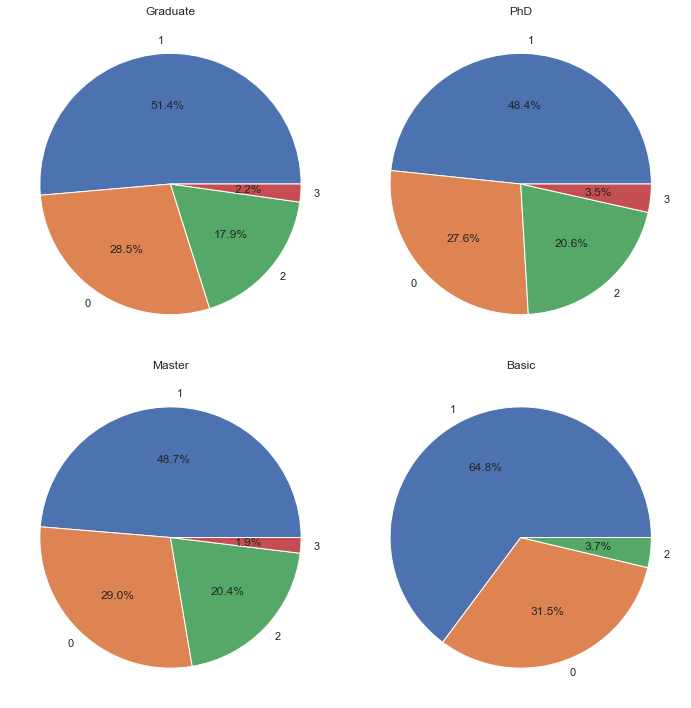

In [29]:
f, ax = plt.subplots(2, 2, figsize=(10,10))

for i, j in enumerate(list(df1['Education'].unique())):
    k = pd.DataFrame(df1.query(f'Education == "{j}"')['Child'].value_counts())
    ax.flat[i].pie(k['Child'], labels=k.index, autopct='%1.1f%%')
    ax.flat[i].set_title(j)
plt.tight_layout()

There is no significant difference in presence of child distribution among customer's household in regards of their education, but we can see that there are no customers with Basic degree that have more than 2 children in their household.

Text(0.5, 1.0, 'Income vs. education')

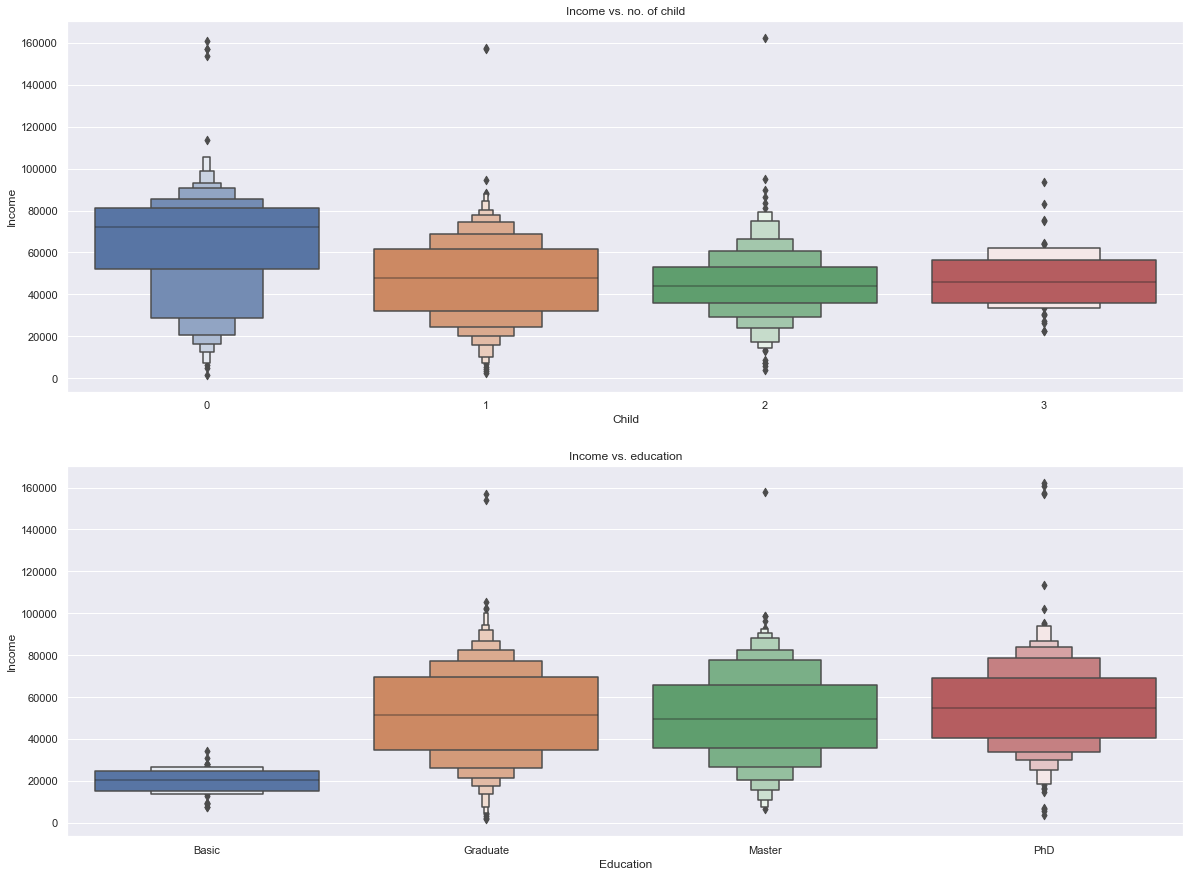

In [30]:
f, ax = plt.subplots(2,1,figsize=(20,15))

# Omitting single extreme outlier in Income feature (666666) for clarity
sns.boxenplot(data=df1.query(f'Income < 600000'), x='Child', y='Income', ax=ax[0]).set_title('Income vs. no. of child')
sns.boxenplot(data=df1.query(f'Income < 600000'), x='Education', y='Income', order=order, ax=ax[1]).set_title('Income vs. education')

From above chart, we can see there's not much of a difference in terms of income when it comes to presence of children in a household, although we can see that income of household with more children in them tends to converge on its median and household with higher income tends to have no child in them. This also explains the downtrend in categorical spendings over the past 2 years that followed the increase of number of child in a household as we found before.

In terms of education level of the participants and their respective income, we don't see any significant difference in income distribution among the participant regardless of their education level, but participants with Basic degree fell short compared to others by a significant margin. Next, we will look at how each marketing campaign performs.

### Marketing campaign acceptance

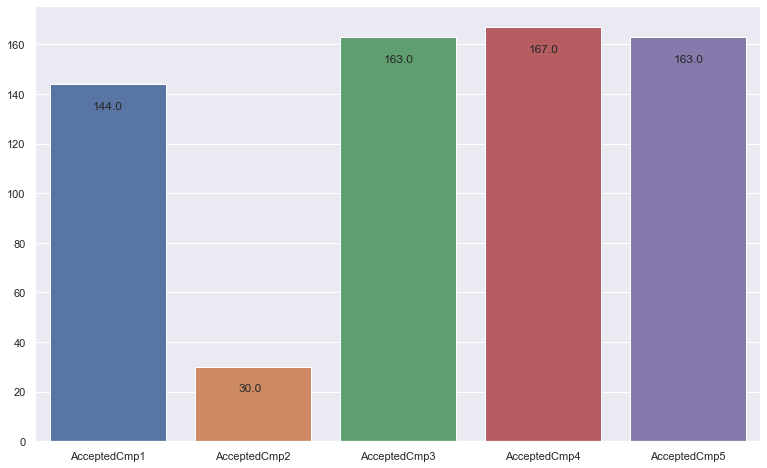

In [31]:
plt.subplots(figsize=(13,8))

ax = sns.barplot(x=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5'],
                 y=df1[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].sum(axis=0))

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.3, p.get_height()-10))

As we can see from chart above, 2nd campaign performs relatively poorly compared to other campaign. As we don't know the deals that were offered in each campaign, we can't do further analysis of each campaign. However, what we can do is check the total acceptance of each campaign compared to all of the respondents.

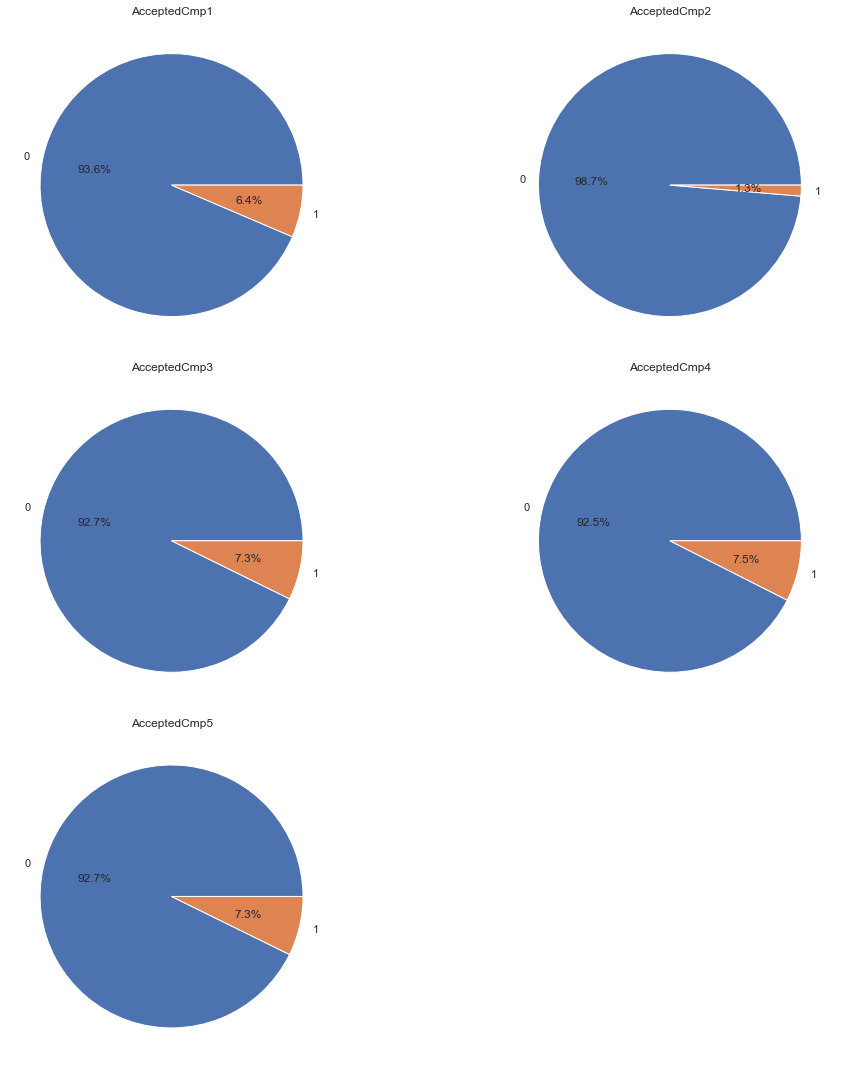

In [32]:
f, ax = plt.subplots(3,2,figsize=(15,15))

for a, b in enumerate(['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']):
    ax.flat[a].pie(df1[b].value_counts(), labels=df1[b].unique(), autopct='%1.1f%%')
    ax.flat[a].set_title(b)
f.delaxes(ax[2,1])
plt.tight_layout()

Turns out, all of the marketing campaigns are received rather very poorly as indicated by chart above. We can dig into this further by inspecting the total acceptance of campaigns and spendings of customers who accept each campaign.

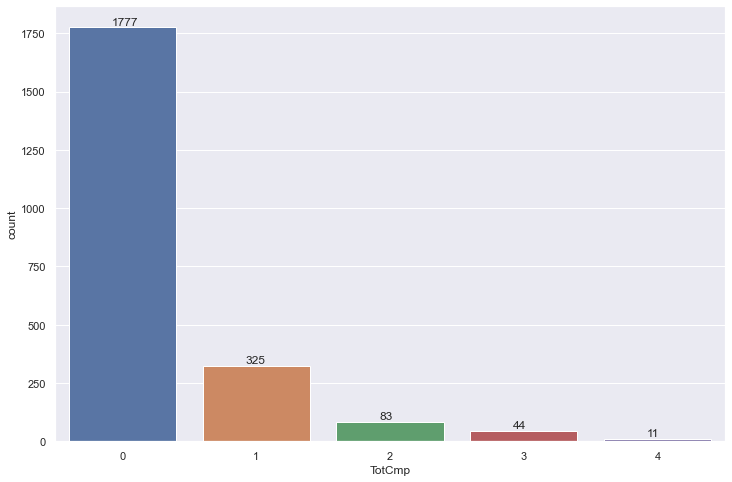

In [33]:
cmps = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

df1['TotCmp'] = df1[cmps].sum(axis=1)

plt.subplots(figsize=(12,8))
ax = sns.countplot(data=df1, x='TotCmp')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.32, p.get_height()+10))

Customers tend to accept only 1 campaign out of all 5 and the number goes down with increase in accepted campaigns.

<AxesSubplot:xlabel='TotCmp', ylabel='Income'>

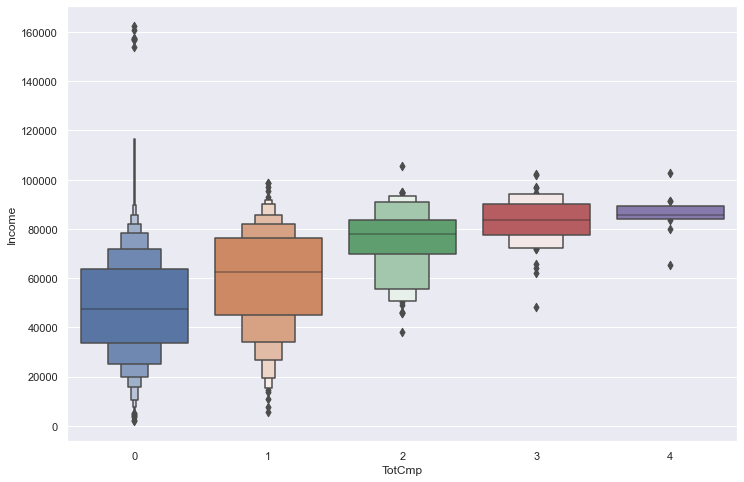

In [34]:
plt.subplots(figsize=(12,8))
sns.boxenplot(data=df1.query('Income < 600000'), x='TotCmp', y='Income')

There is a clear positive correlation between total of accepted campaigns and the income of customers, implying that the higher their income, the more likely they will accept more campaign regardless of the content of the campaign.

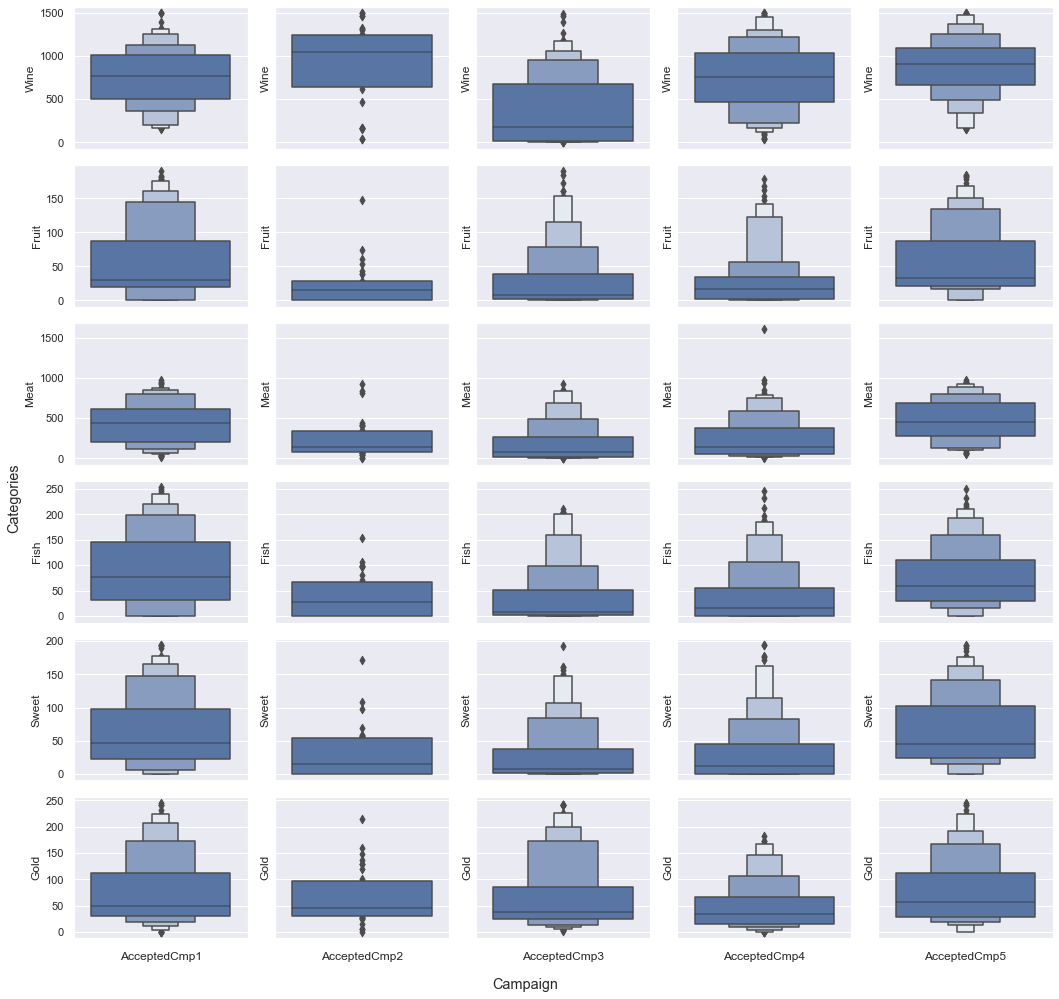

In [35]:
f, ax = plt.subplots(6,5,figsize=(15,14), sharey='row')

for a, b in enumerate(mnts):
    for c in range(1,6):
        sns.boxenplot(data=df1.query(f'AcceptedCmp{c} == 1'), y=b, hue=b, ax=ax[a, c-1])
        ax[5,c-1].set_xlabel(f'AcceptedCmp{c}')


f.supxlabel('Campaign')
f.supylabel('Categories')
plt.tight_layout()

As we can see from above, there are patterns of preference by customers of each campaign. Customers who spent more money on wine is likely to accept the 2nd campaign, whereas customers who spent more on meat, sweets and gold are likely to accept the 1st and 5th campaign. As for customers who spent on fish products more prefer 1st campaign, followed by 5th campaign.

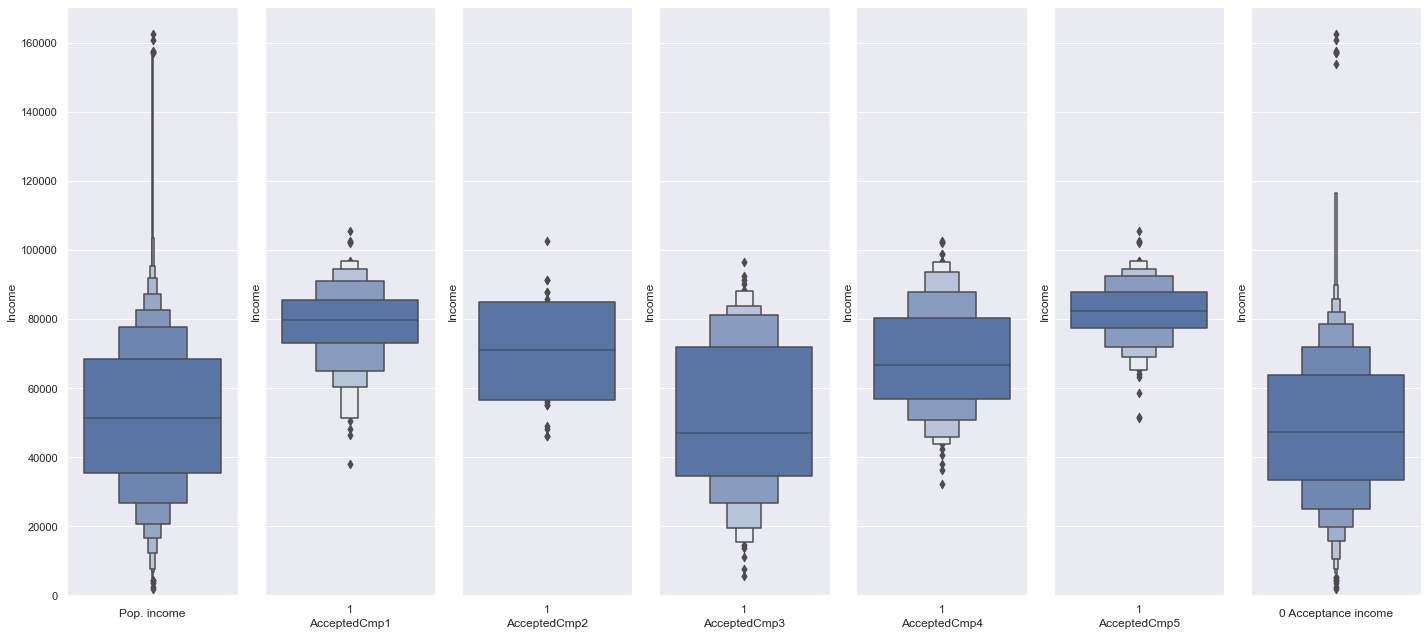

In [36]:
f, ax = plt.subplots(1,7,figsize=(20,9), sharey=True)

for a, b in enumerate(cmps):
    sns.boxenplot(data=df1.query(f'Income < 600000 & {b} == 1'), x=b, y='Income', ax=ax[a+1])

sns.boxenplot(data=df1.query(f'Income < 600000'), y='Income', ax=ax[0])
ax[0].set_xlabel('Pop. income')

sns.boxenplot(data=df1.query('Income < 600000 & TotCmp == 0'), y='Income', ax=ax[6])
ax[6].set_xlabel('0 Acceptance income')

plt.ylim(0,)
plt.tight_layout()

Chart above explains why customers who accepted 3rd campaign spends the least amount in almost all of product category as the customers are on the lower income bracket relative to all customers who participated in the survey. Another interesting thing is the income distribution of participants who accepted 2nd campaign is not on the upper part of the population's income bracket as customers who accepted that campaign tend to spend more on wine, which in turn usually on the upper bracket of income.

## Data Cleaning

We will create a slicer of int64 and float64 features and then plot with boxplot.

In [37]:
numcols = list(df1.select_dtypes(include=['int64','float64']).columns)
numcols

['Age',
 'CustFor',
 'Child',
 'Income',
 'Recency',
 'Wine',
 'Fruit',
 'Meat',
 'Fish',
 'Sweet',
 'Gold',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'Complain',
 'Response',
 'TotMnt',
 'TotPurch',
 'TotCmp']

In [38]:
# Slicer for spendings based on category
numcols1 = ['Age','CustFor','Income','Wine','Fruit','Meat','Fish','Sweet','Gold']

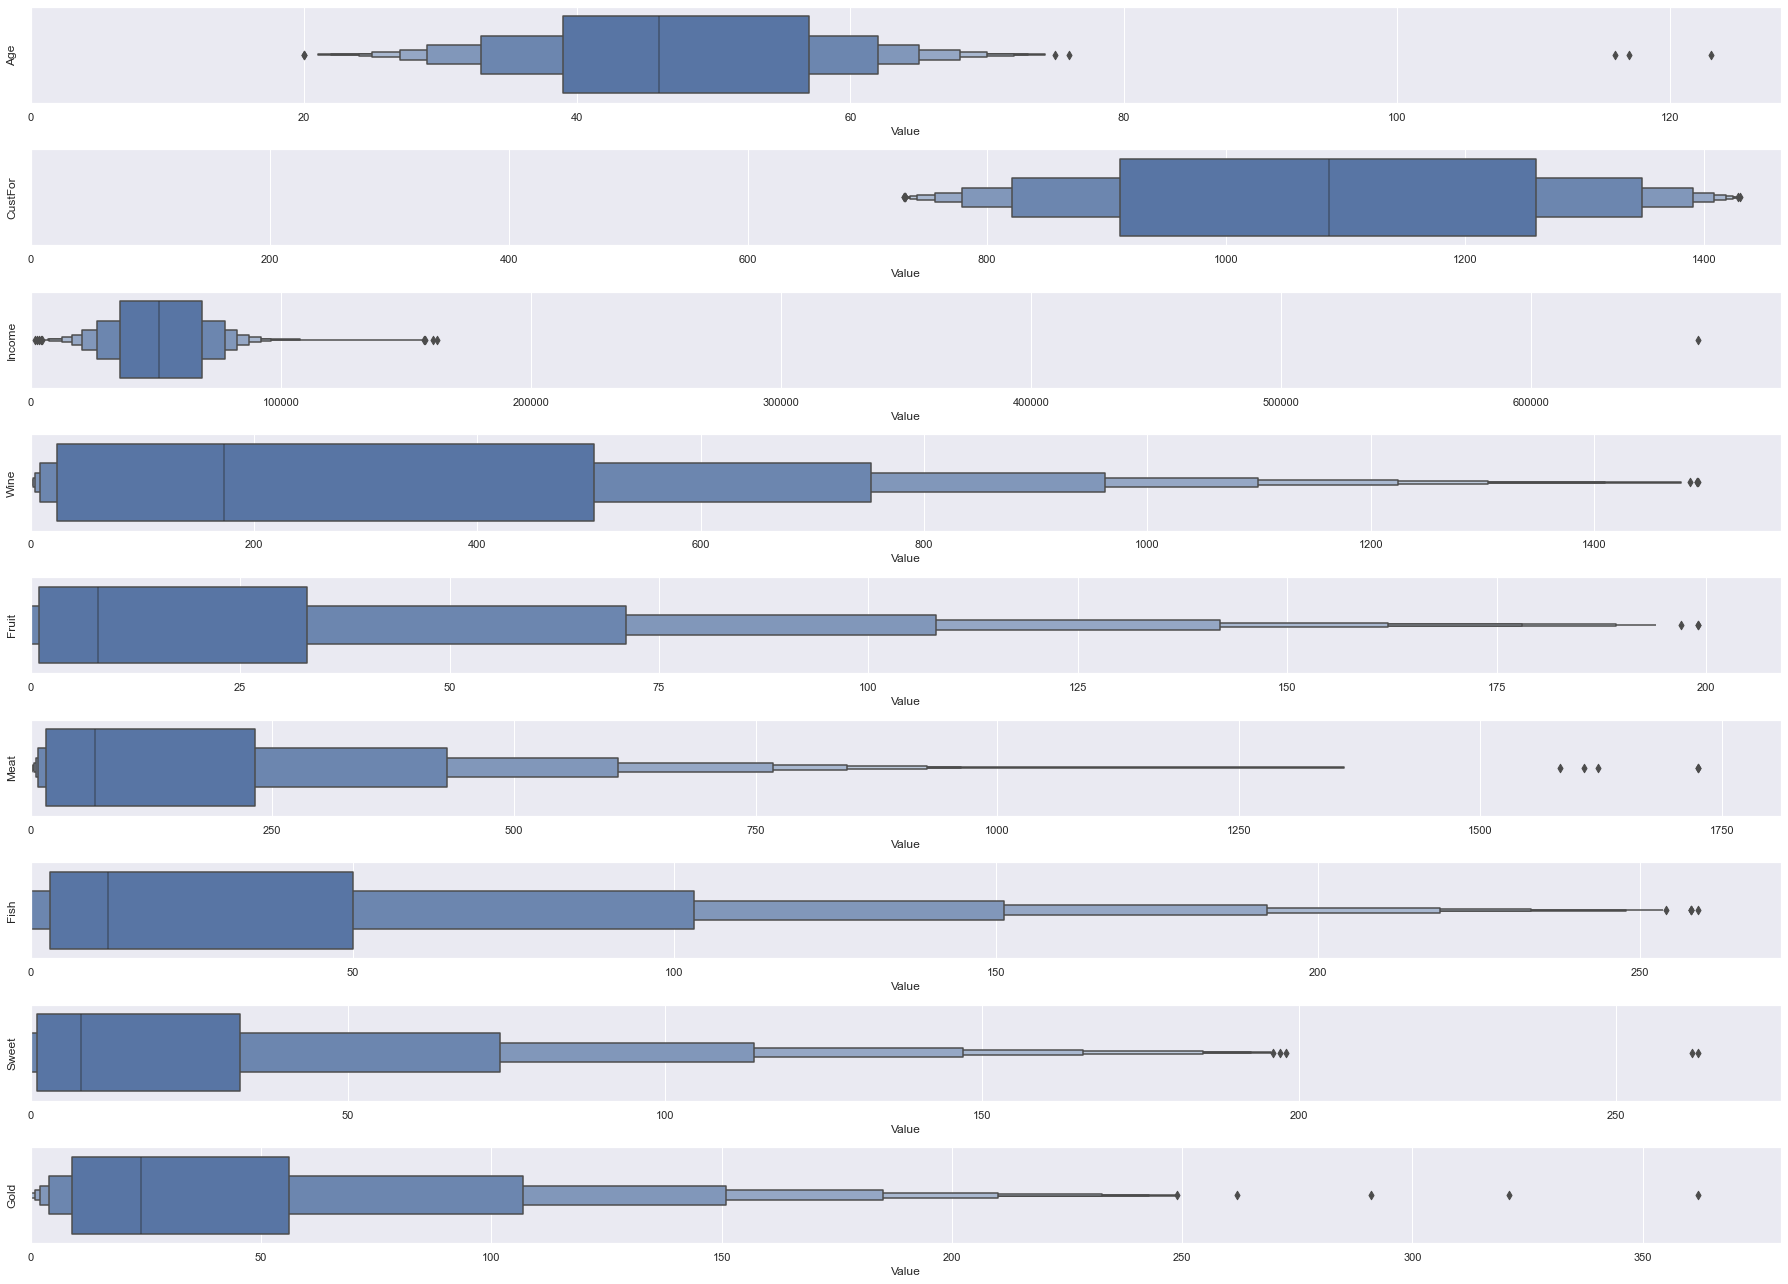

In [39]:
f, ax = plt.subplots(9,1, figsize=(25,18))
for i, col in enumerate(numcols1):
    sns.boxenplot(data=df1, x=col,ax=ax[i], orient='h')
    ax[i].set_xlim(0,)
    ax[i].set_xlabel('Value')
    ax[i].set_ylabel(col)
plt.tight_layout()

From box plots, we can see there are extreme outliers in Income and Age that can impact the clustering negatively. We will remove it in the following step.

In [40]:
# Upper fence calculation
q1, q3 = df1['Income'].quantile(q=[.25,.75])
ufenceincome = q3 + (q3-q1)
print(f'Upper fence of income: {ufenceincome}\n')

q1, q3 = df1['Age'].quantile(q=[.25,.75])
ufenceage = q3 + (q3-q1)
print(f'Upper fence of age: {ufenceage}\n')

# Outlier removal
df1 = df1.query(f'Income < {ufenceincome}')
df1 = df1.query(f'Age < {ufenceage}')
print(f'Data removed: {len(df)-len(df1)}')

Upper fence of income: 101040.75

Upper fence of age: 75.0

Data removed: 18


## Preprocessing

In the preprocessing part, we will prepare the data for clustering. Firstly, let's encode all of object features.

In [41]:
from sklearn.preprocessing import LabelEncoder

#creates another copy of cleaned df for encoding and scaling
dfes = df1.copy()

LE = LabelEncoder()

for z in objcols:
    dfes[z] = dfes[[z]].apply(LE.fit_transform)

Next, all of relevant int64 and float64 features will be scaled.

In [42]:
from sklearn.preprocessing import StandardScaler

# Create new slicer
numcols2 = ['Age', 'CustFor', 'Child', 'Income', 'Wine', 'Fruit', 'Meat', 'Fish', 'Sweet', 'Gold']

dfes = dfes[numcols2]

scaler = StandardScaler()
scaler.fit(dfes)
dfes = pd.DataFrame(scaler.transform(dfes), columns=numcols2)

Finally, we will use PCA to reduce the dimension of the data into 3 dimensions.

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(dfes)
dfPCA = pd.DataFrame(pca.transform(dfes), columns=['col1','col2','col3'])

dfPCA.describe()

col1          col2          col3
count  2.222000e+03  2.222000e+03  2.222000e+03
mean   5.696014e-18 -2.858000e-17 -2.108524e-17
std    2.099027e+00  1.076108e+00  1.024626e+00
min   -2.956063e+00 -3.112728e+00 -2.444519e+00
25%   -1.775430e+00 -7.993134e-01 -8.757297e-01
50%   -7.568216e-01  4.023836e-02  4.833480e-03
75%    1.625473e+00  8.401358e-01  8.336798e-01
max    6.588821e+00  3.465370e+00  2.460504e+00

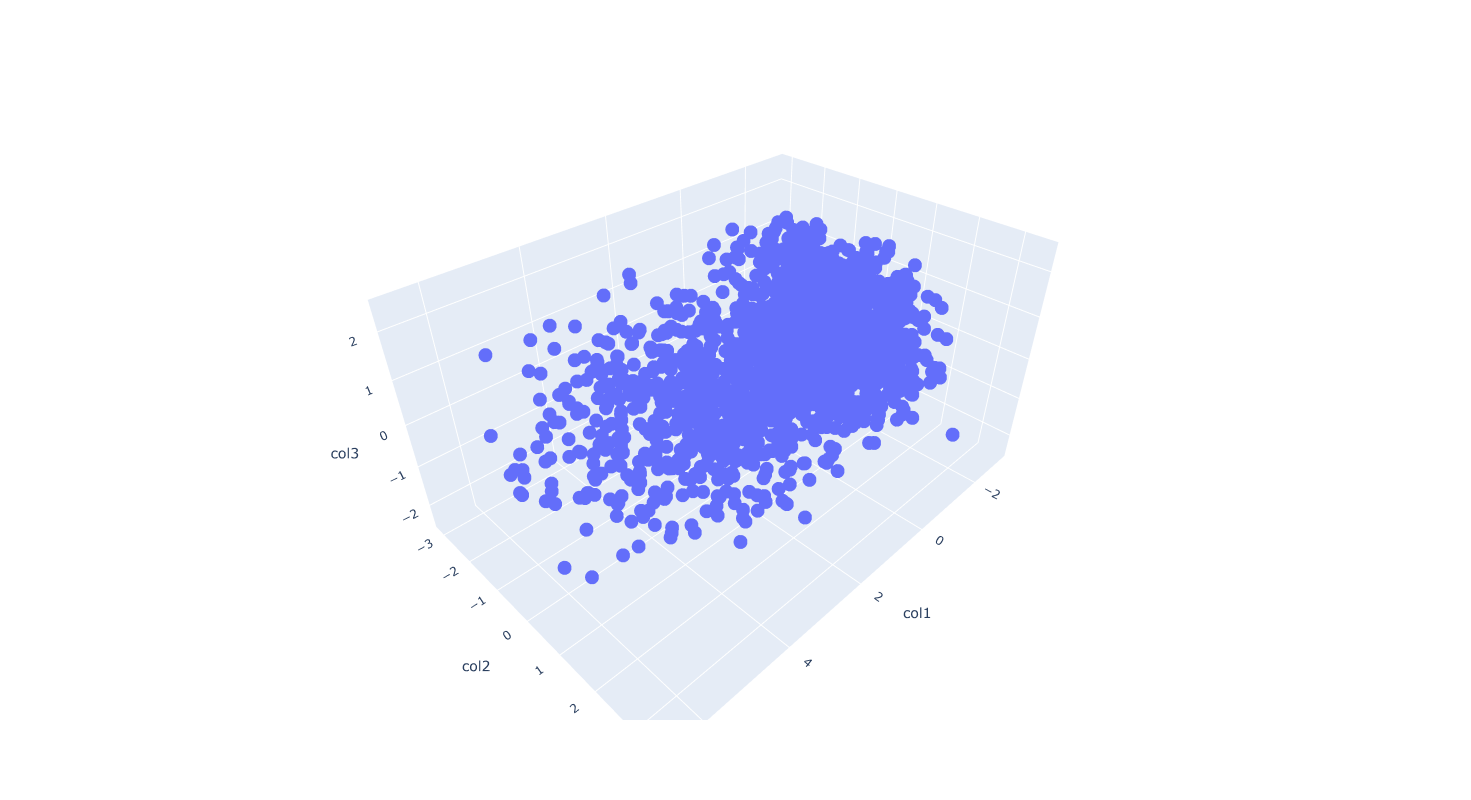

In [44]:
import plotly.express as px

fig = px.scatter_3d(dfPCA, x='col1', y='col2', z='col3', width=800, height=800)
fig.show()

## Clustering

In this profiling project, we will use K-Means clustering method to group the customers based on their economic and family background, along with their respective categorical spendings.

Elbow Method to determine the number of clusters:


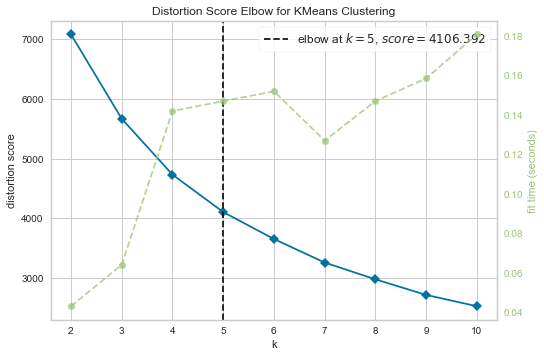

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

print('Elbow Method to determine the number of clusters:')
elbowfig = KElbowVisualizer(KMeans(), k=10)
elbowfig.fit(dfPCA)
elbowfig.show()

As we can see, the elbow method gives us an optimum number of 5 clusters. Let's validate this by checking the silhouette score.

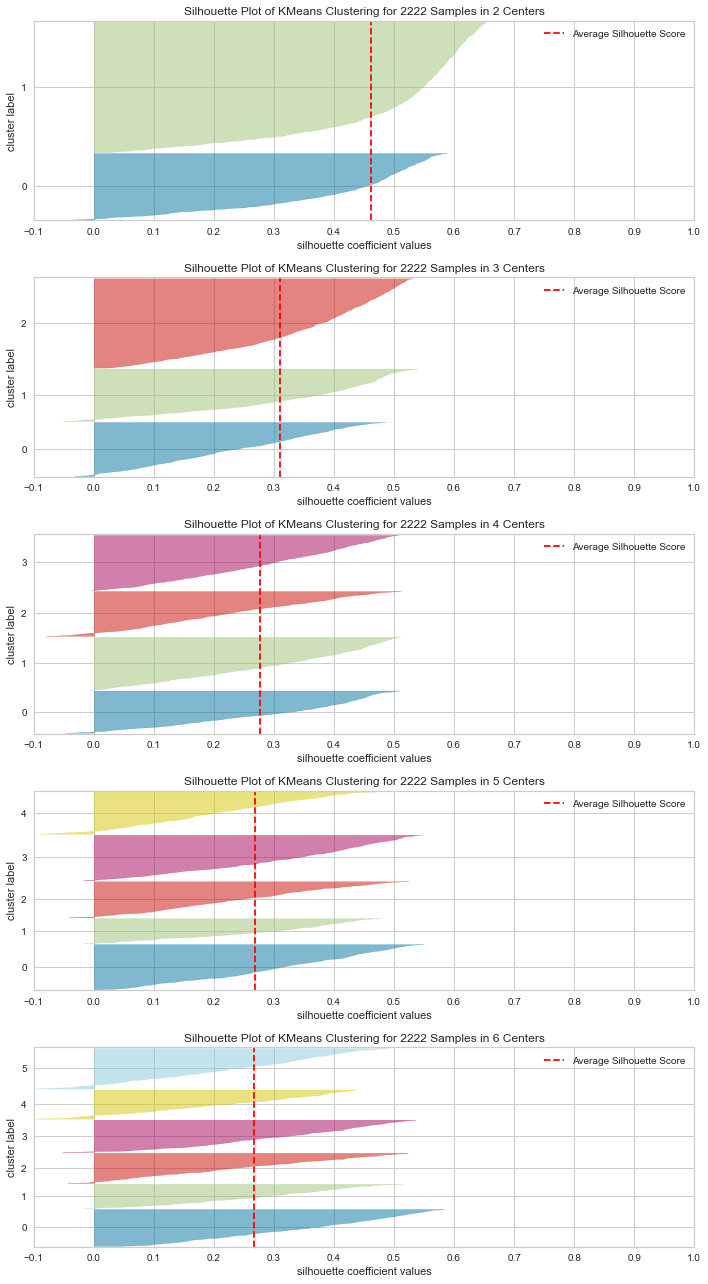

In [46]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters1 = range(2,7)
f, ax = plt.subplots(5,1,figsize=(10,18))

for a in clusters1:
    model = KMeans(a, init='k-means++', n_init=100, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[a-2])
    visualizer.fit(dfPCA)
    visualizer.finalize()
    ax[a-2].set_xlim(-0.1,1)

plt.tight_layout()

Validating with silhouette score, we found out that 4 clusters is the most optimum number of clusters as the score of each cluster is well above the average and it gives us the most even data points distribution. We will proceed with 4 clusters and adding the feature into the data.

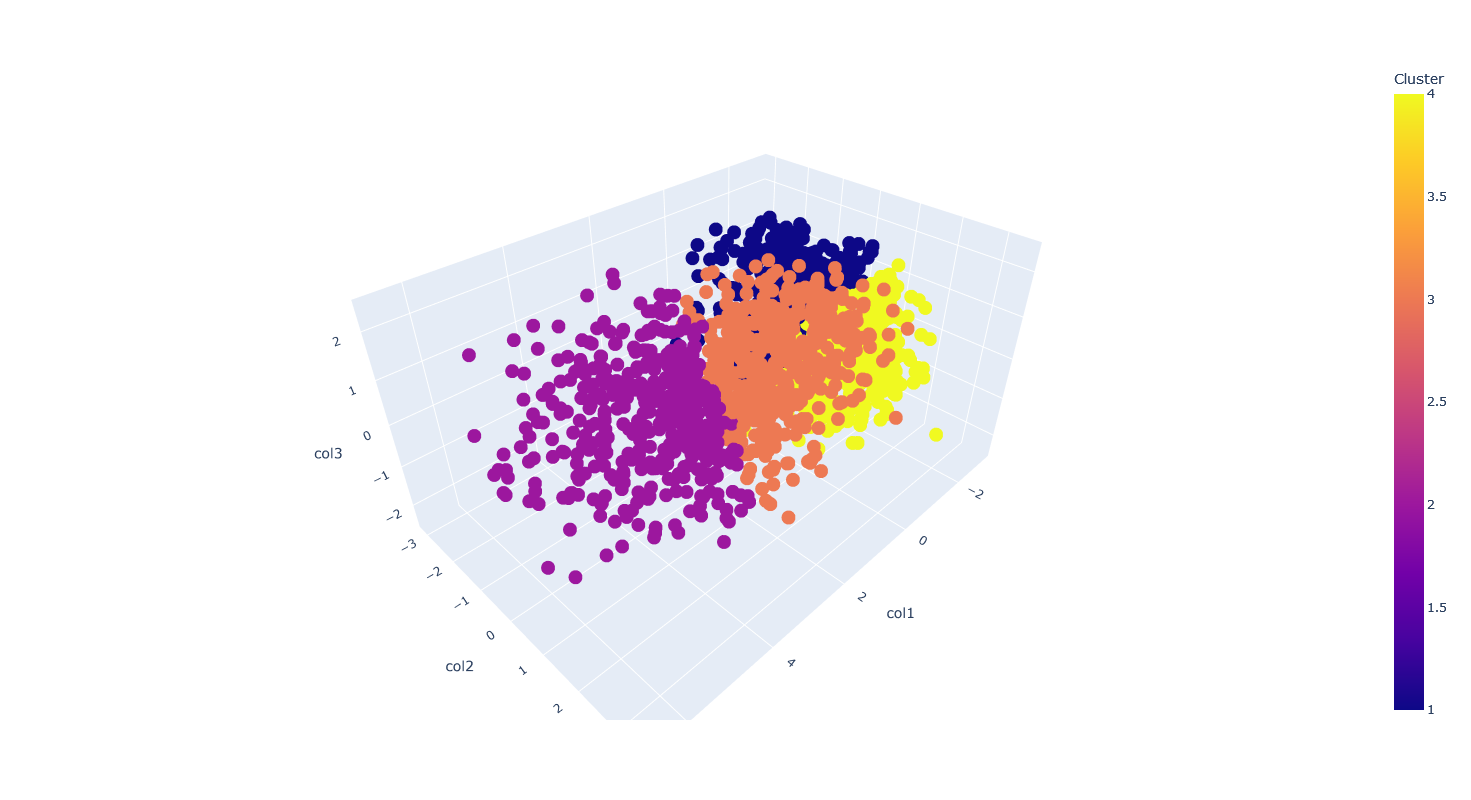

In [47]:
km = KMeans(n_clusters=4, init='k-means++', random_state=42)
km.fit(dfPCA)
cluster = km.predict(dfPCA)

dfc = dfPCA

dfc['Cluster'] = cluster + 1

# Adding cluster to the original data frame
df1['Cluster'] = cluster + 1

fig = px.scatter_3d(dfc, x='col1', y='col2', z='col3', color='Cluster', width=800, height=800)
fig.show()

Members of each clusters are well-grouped, although there are few overlaps between some of the cluster.

## Cluster Analysis

After unsupervised clustering, we will try to analyze the clusters based on the customer's background and profiling them in the process.

<AxesSubplot:xlabel='TotMnt', ylabel='Income'>

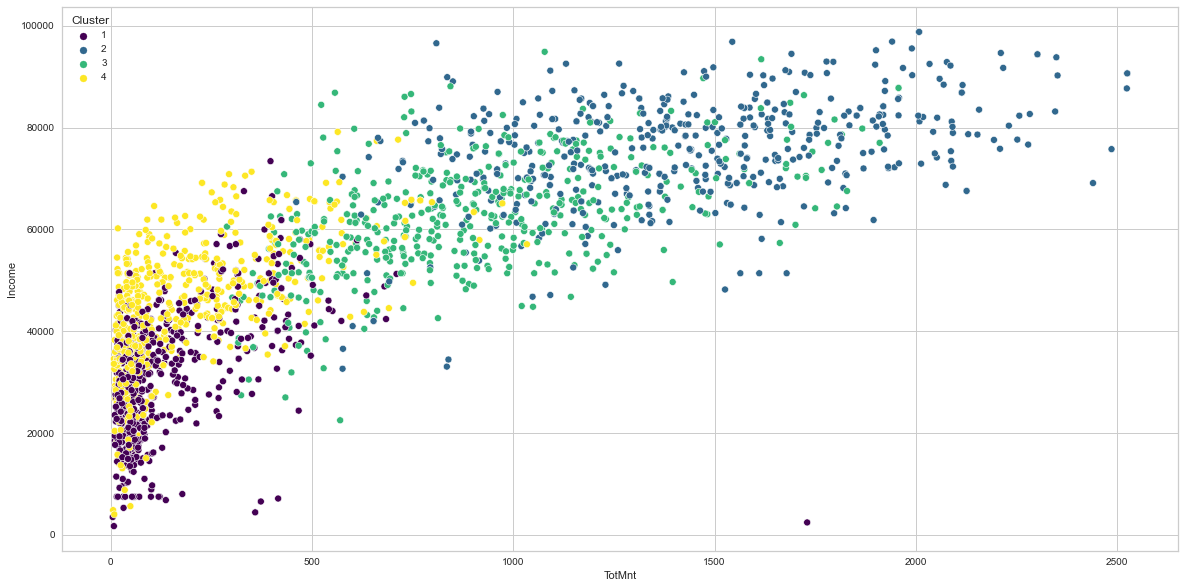

In [48]:
plt.subplots(figsize=(20,10))

sns.scatterplot(data=df1, x='TotMnt', y='Income', hue='Cluster', palette='viridis')

#### From above scatter plot, we can identify those 4 clusters as:
    1: Low income with low spending
    2: High income with high spending
    3: Average income with average spending
    4: Average income with low spending

In the following, we'll take a look at each cluster's features distribution to check for any common features in each cluster.

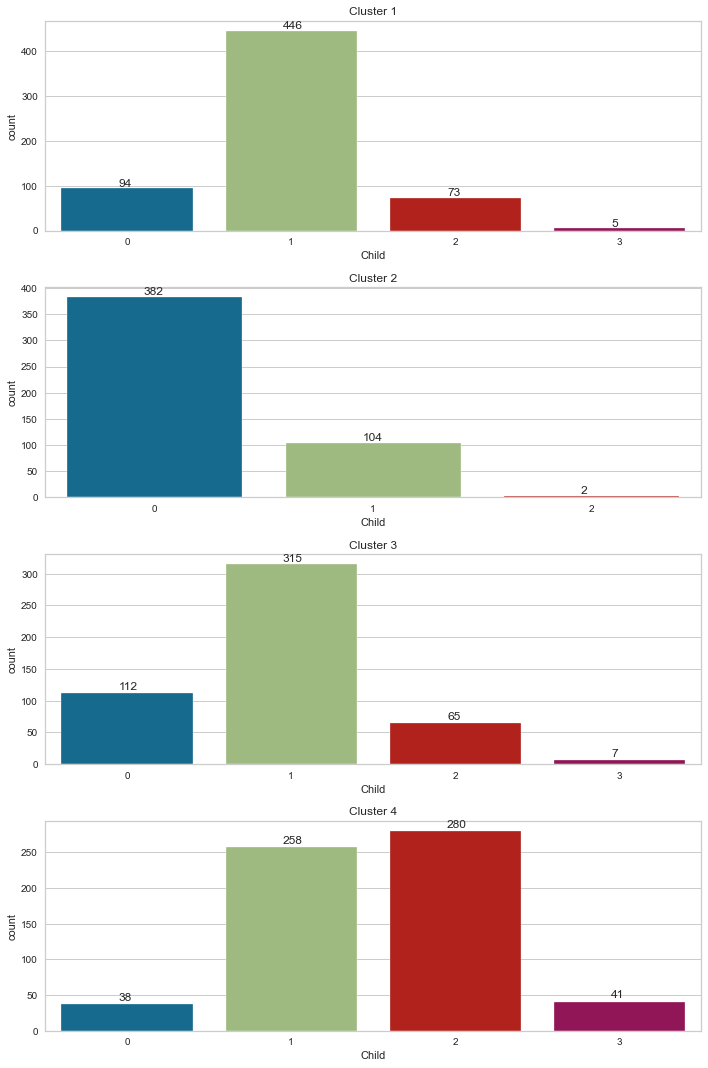

In [49]:
f, ax = plt.subplots(4,1,figsize=(10,15))

for a in range(1,5):
    ax[a-1].set_title(f'Cluster {a}')
    sns.countplot(data=df1.query(f'Cluster == {a}'), x='Child', ax=ax[a-1])
    for p in ax[a-1].patches:
        ax[a-1].annotate(f'{p.get_height()}', (p.get_x()+0.35, p.get_height()+5))

plt.tight_layout()

<AxesSubplot:xlabel='Cluster', ylabel='count'>

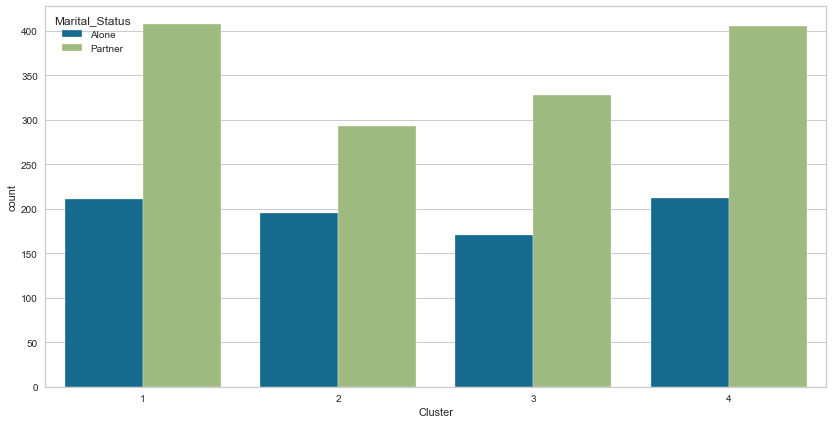

In [50]:
plt.subplots(figsize=(14,7))

sns.countplot(data=df1, x='Cluster', hue='Marital_Status')

Cluster 2 is the unique one among other clusters, as it is overwhelmingly dominated by household without any chlidren in it, in stark contrast with Cluster 4 which mostly have 1 or 2 children in it. For the presence of partner, no notable uniqueness can be observed from all of the clusters as the majority of each cluster have partner.

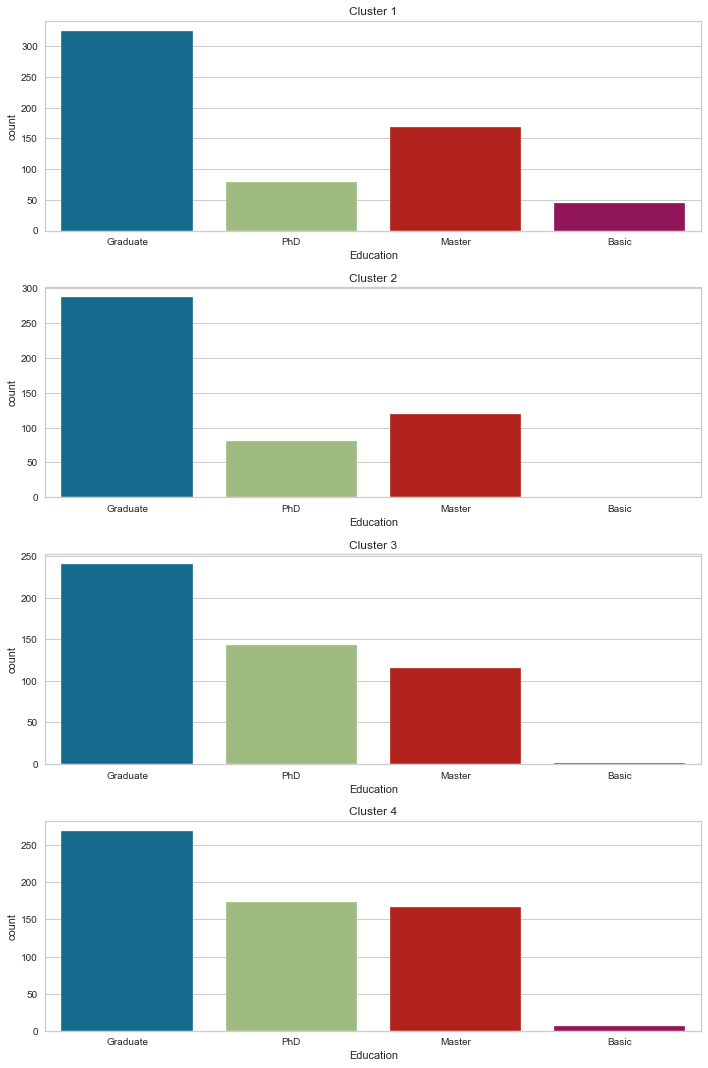

In [51]:
f, ax = plt.subplots(4,1,figsize=(10,15))

for a in range(1,5):
    ax[a-1].set_title(f'Cluster {a}')
    sns.countplot(data=df1.query(f'Cluster == {a}'), x='Education', order=df1['Education'].unique(), ax=ax[a-1])

plt.tight_layout()

Customers with Graduate degree is the majority members across all clusters

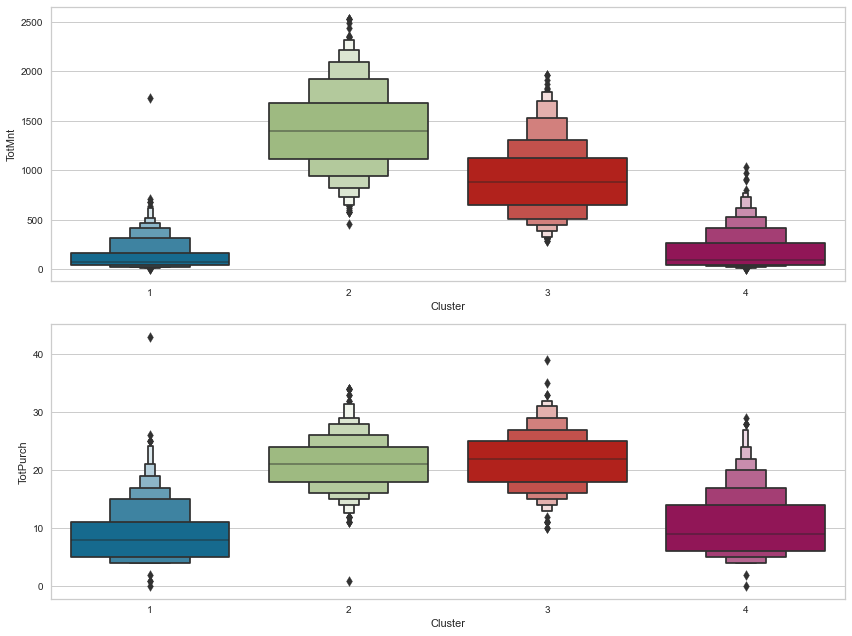

In [52]:
f, ax = plt.subplots(2,1, figsize=(12,9))

sns.boxenplot(data=df1, x='Cluster', y='TotMnt', ax=ax[0])
sns.boxenplot(data=df1, x='Cluster', y='TotPurch', ax=ax[1])
plt.tight_layout()

From general overview, cluster 2 made less amount of purchases in client's store compared to cluster 3, despite the fact that cluster 2 is the biggest spender among all clusters and by no small margin at that.

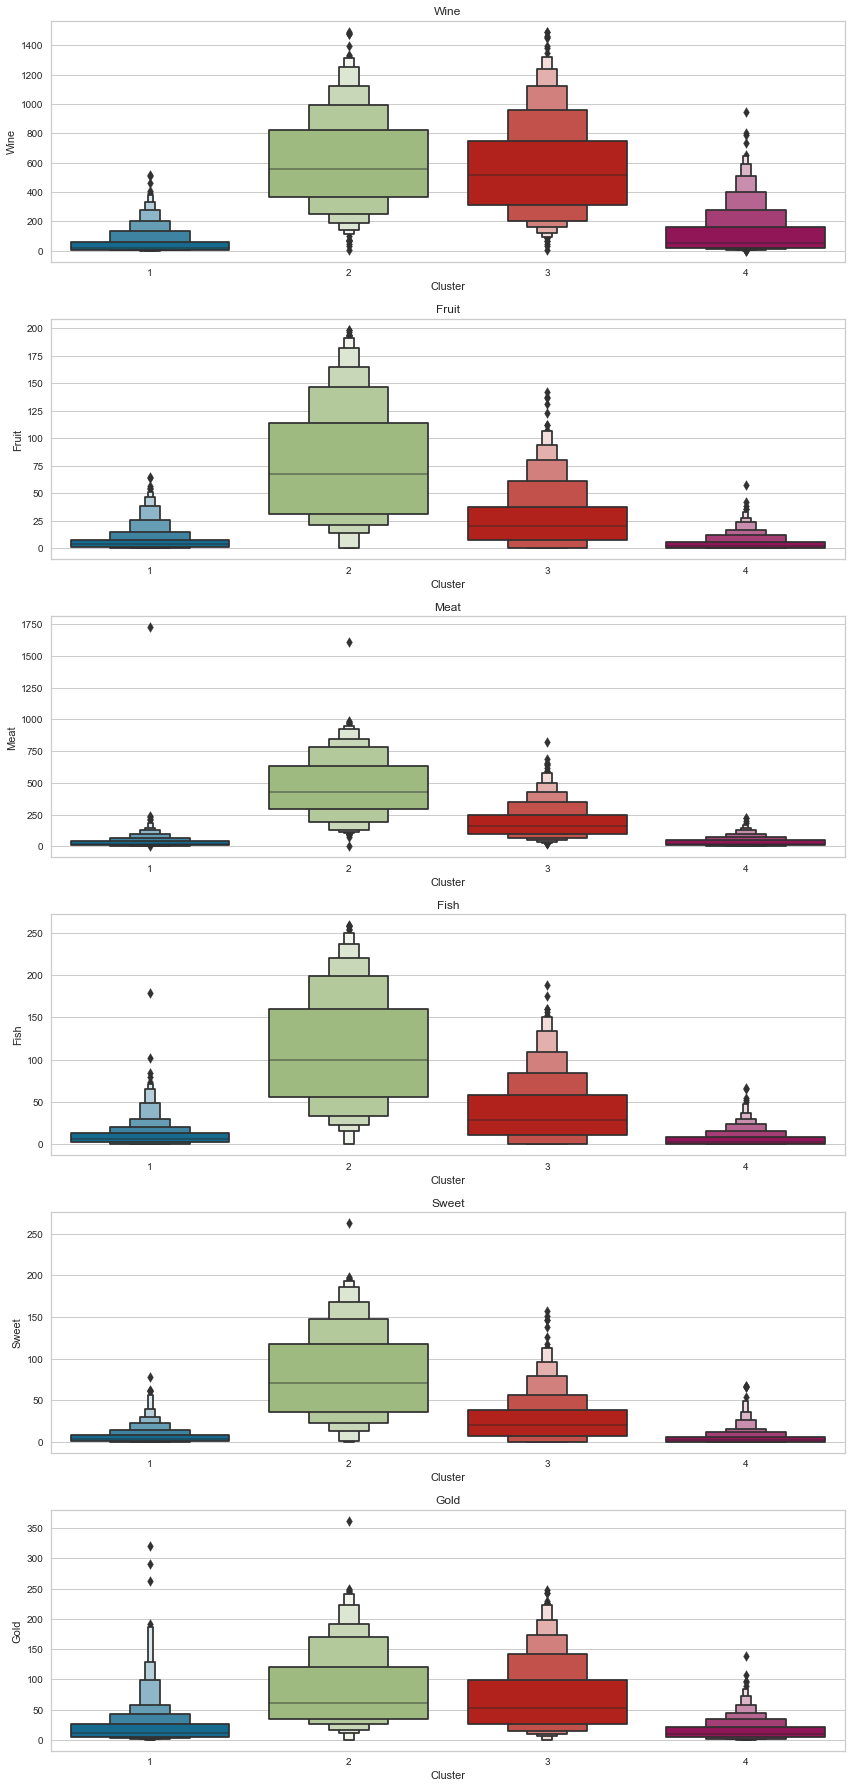

In [53]:
f, ax = plt.subplots(6,1,figsize=(12,25))

for a, b in enumerate(mnts):
    ax[a].set_title(f'{b}')
    sns.boxenplot(data=df1, x='Cluster', y=b, ax=ax[a])
plt.tight_layout()

There's nothing out of ordinary in spendings distribution of each cluster in every categories as it aligns with the initial profiling of each cluster. One thing to note is spendings in wine category, which tells us that customer who has average to high spending tends to consume more wine products than their peers. This is a good indicator for targeted marketing for wine products.

## Conclusion

From EDA and clustering that we've made, there are some key takeaways:
1. Customers that tend to spend more across every item category than other are of higher income bracket, having Bachelor degree, partnered and does not bear any child.
2. Consequently, the higher income of customer is, the more likely they will accept marketing campaign, regardless of their education level, partnership status and presence of any child.
3. Customers with economic and social background specified in 1st point, whether they are in high or medium income bracket, will react more positively towards marketing campaigns that are focused on wine products.

In [55]:
df1.to_csv('marketing_campaign_finished.csv', index=False)